Data Cleaning Walkthrough: Cleaning and Combining the Data

At many points in your career, you'll need to be able to build complete, end-to-end data science projects on your own. Data science projects usually consist of one of two things:

    -An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.
    -An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices will rise and fall would be one example.

You'll find the ability to create data science projects useful in several different contexts:

    -Projects will help you build a portfolio, which is critical to finding a job as a data analyst or scientist.
    -Working on projects will help you learn new skills and reinforce existing concepts.
    -Most "real-world" data science and analysis work consists of developing internal projects.
    -Projects allow you to investigate interesting phenomena and satisfy your curiosity.

Whether you aim to become a data scientist or analyst or you're just curious about the world, building projects can be immensely rewarding.

Here's an example of a finished project.

In this mission, we'll walk through the first part of a complete data science project, including how to acquire the raw data. The project will focus on exploring and analyzing a data set. We'll develop our data cleaning and storytelling skills, which will enable us to build complete projects on our own.

We'll focus primarily on data exploration in this mission. We'll also combine several messy data sets into a single clean one to make analysis easier. Over the next few missions, we'll work through the rest of our project and perform the actual analysis.

The first step in creating a project is to decide on a topic. You want the topic to be something you're interested in and motivated to explore. It's very obvious when people are making projects just to make them, rather than out of a genuine interest in the topic.

Here are two ways to go about finding a good topic:

    -Think about what sectors or angles you're really interested in, then find data sets relating to those sectors.
    -Review several data sets, and find one that seems interesting enough to explore.

Whichever approach you take, you can start your search at these sites:

    -Data.gov - A directory of government data downloads
    -/r/datasets - A subreddit that has hundreds of interesting data sets
    -Awesome datasets - A list of data sets hosted on GitHub
    -rs.io - A great blog post with hundreds of interesting data sets

In real-world data science, you may not find an ideal data set. You might have to aggregate disparate data sources instead, or do a good amount of data cleaning.

For the purposes of this project, we'll be using data about New York City public schools, which can be found here.

Once you've chosen a topic, you'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze, but isn't so complicated that it's difficult to get started. You want to finish the project, and you want your results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online, as well as the demographics for each high school. The first few rows of the SAT data look like this:

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

    -SAT scores by school - SAT scores for each high school in New York City
    -School attendance - Attendance information for each school in New York City
    -Class size - Information on class size for each school
    -AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
    -Graduation outcomes - The percentage of students who graduated, and other outcome information
    -Demographics - Demographic information for each school
    -School survey - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.



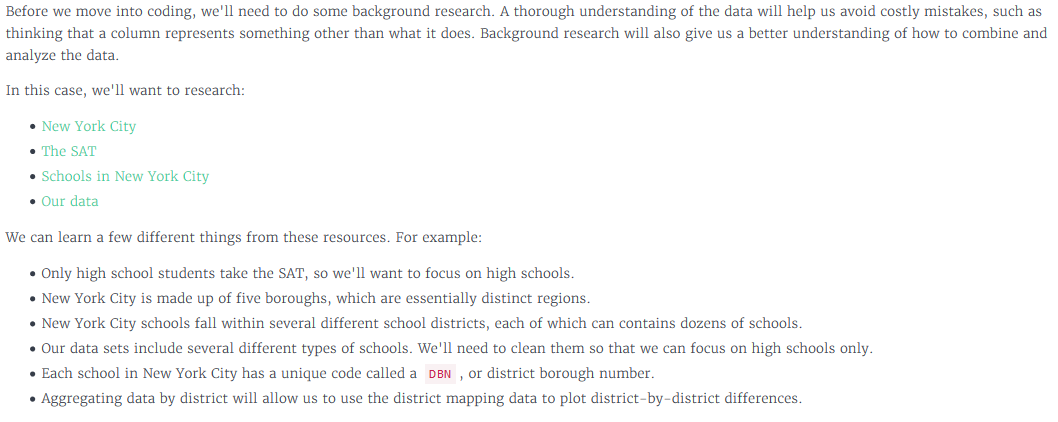

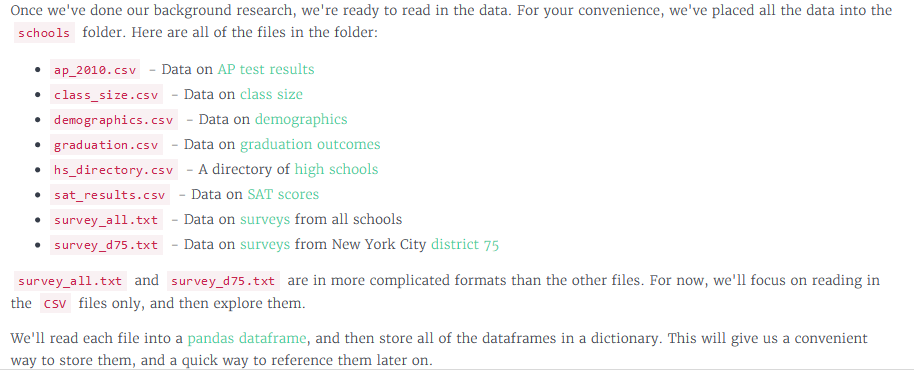

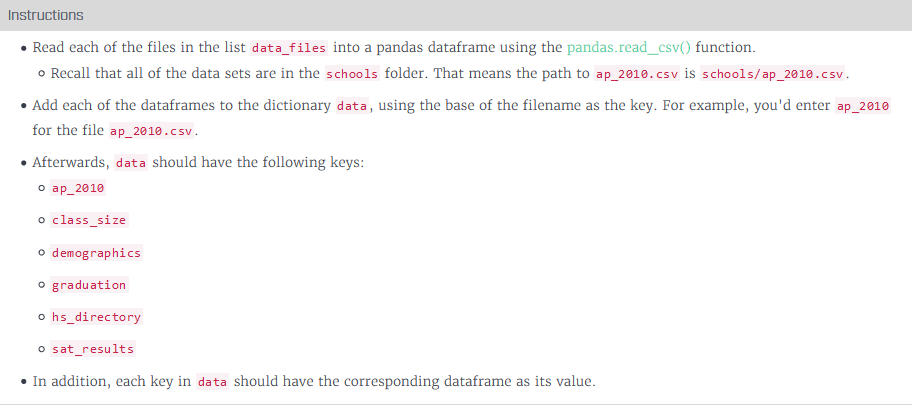

In [63]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

In [64]:
data_files

['ap_2010.csv',
 'class_size.csv',
 'demographics.csv',
 'graduation.csv',
 'hs_directory.csv',
 'sat_results.csv']

In [65]:
ap_2010=pd.read_csv("ap_2010.csv")

In [66]:
demographics=pd.read_csv("demographics.csv")

In [67]:
graduation = pd.read_csv("graduation.csv")

In [68]:
hs_directory = pd.read_csv("hs_directory.csv")

In [69]:
sat_results = pd.read_csv("sat_results.csv")

In [70]:
class_size = pd.read_csv("class_size.csv")

In [71]:
data = {'ap_2010':ap_2010, 'demographics': demographics, 'graduation':graduation, 'hs_directory':hs_directory, 'sat_results':sat_results, 'class_size':class_size}


In [72]:
for d in data:
    
     print (data[d].head())
    
    

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
      DBN                       Name  schoolyear fl_percent  frl_percent  \
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006       89.4          NaN   
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007       89.4        

In [73]:
class_size.head()

CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   
3                           -                               17.0   
4                           -                               15.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   
2                 1.0                17.0                    17.0   
3                 1.0                17.0                    17.0   
4                 1.0                15.0                    15.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  
0                   19.0         ATS                             NaN  
1                   21.0         ATS                             NaN  
2                   17.0         ATS                             NaN  
3                   17.0         ATS                             NaN  
4                   15.0         ATS                             NaN

Use the pandas.DataFrame.head() method along with the print() function to display the first five rows of the dataframe.


In [74]:
data["sat_results"].head()

DBN                                    SCHOOL NAME sat_score  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES        29   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL        91   
2  01M450                     EAST SIDE COMMUNITY SCHOOL        70   
3  01M458                      FORSYTH SATELLITE ACADEMY         7   
4  01M509                        MARTA VALLE HIGH SCHOOL        44   

  SAT Critical Reading Avg. Score SAT Math Avg. Score SAT Writing Avg. Score  
0                             355                 404                    363  
1                             383                 423                    366  
2                             377                 402                    370  
3                             414                 401                    359  
4                             390                 433                    384



We can make some observations based on the first few rows of each one.

    1-Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
    2-Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
    3-Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (survey_all.txt and survey_d75.txt), but we didn't read those files in because they're in a slightly more complex format.

Each survey text file looks like this:


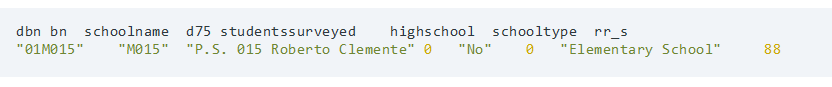

The files are tab delimited and encoded with Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 is rarely used, and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, here's a good primer.

We'll need to specify the encoding and delimiter to the pandas pandas.read_csv() function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the pandas.concat() function:

z = pd.concat([x,y], axis=0)

The code above will combine dataframes x and y by essentially appending y to the end of x. The combined dataframe z will have the number of rows in x plus the number of rows in y.

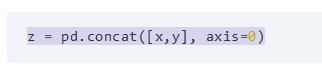

In [75]:
#Instruction:

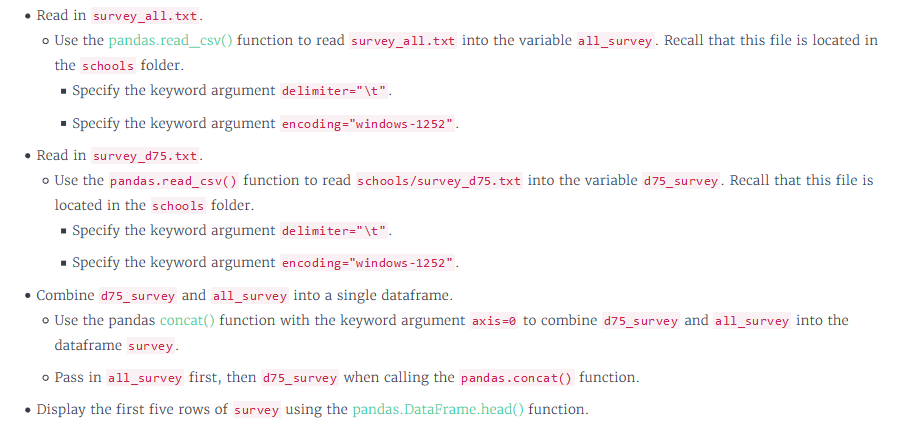

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

print(survey.head())

     N_p    N_s   N_t  aca_p_11  aca_s_11  aca_t_11  aca_tot_11    bn  \
0   90.0    NaN  22.0       7.8       NaN       7.9         7.9  M015   
1  161.0    NaN  34.0       7.8       NaN       9.1         8.4  M019   
2  367.0    NaN  42.0       8.6       NaN       7.5         8.0  M020   
3  151.0  145.0  29.0       8.5       7.4       7.8         7.9  M034   
4   90.0    NaN  23.0       7.9       NaN       8.1         8.0  M063   

   com_p_11  com_s_11  ...  t_q8c_1  t_q8c_2  t_q8c_3 t_q8c_4  t_q9  t_q9_1  \
0       7.6       NaN  ...     29.0     67.0      5.0     0.0   NaN     5.0   
1       7.6       NaN  ...     74.0     21.0      6.0     0.0   NaN     3.0   
2       8.3       NaN  ...     33.0     35.0     20.0    13.0   NaN     3.0   
3       8.2       5.9  ...     21.0     45.0     28.0     7.0   NaN     0.0   
4       7.9       NaN  ...     59.0     36.0      5.0     0.0   NaN    10.0   

   t_q9_2  t_q9_3  t_q9_4  t_q9_5  
0    14.0    52.0    24.0     5.0  
1     6.0     

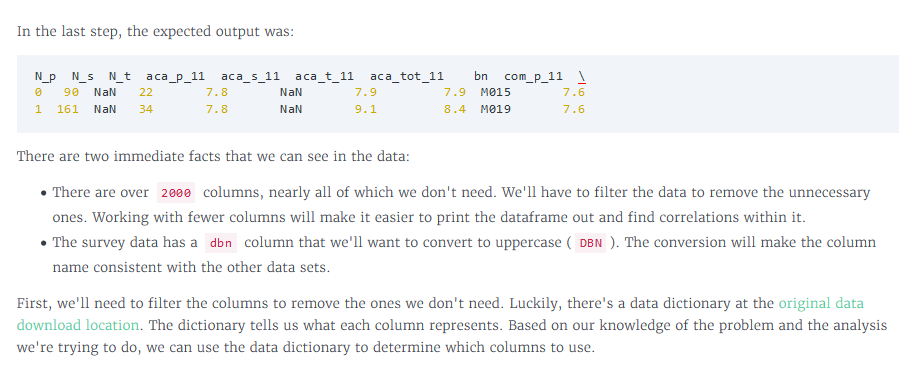

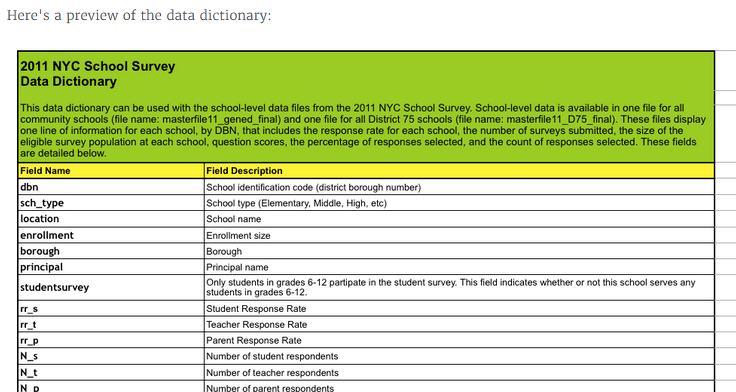

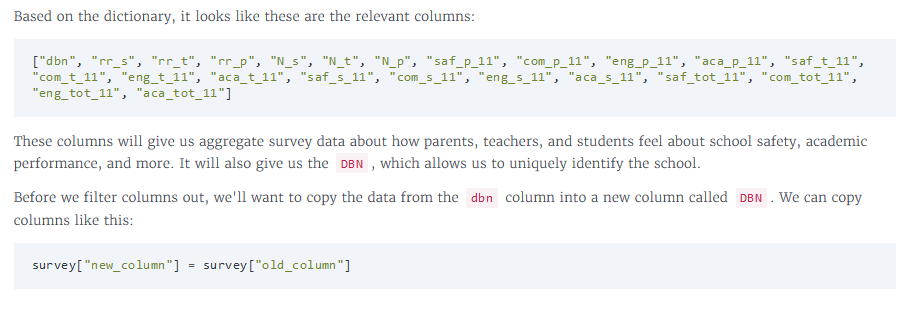

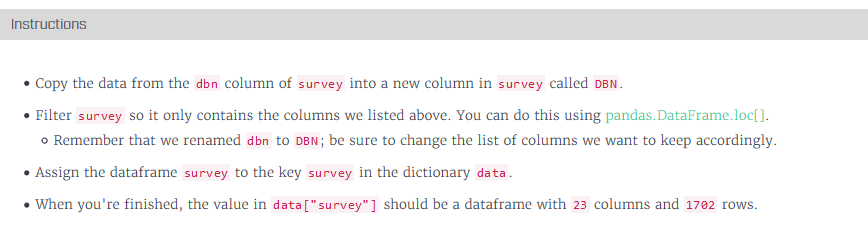

In [78]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

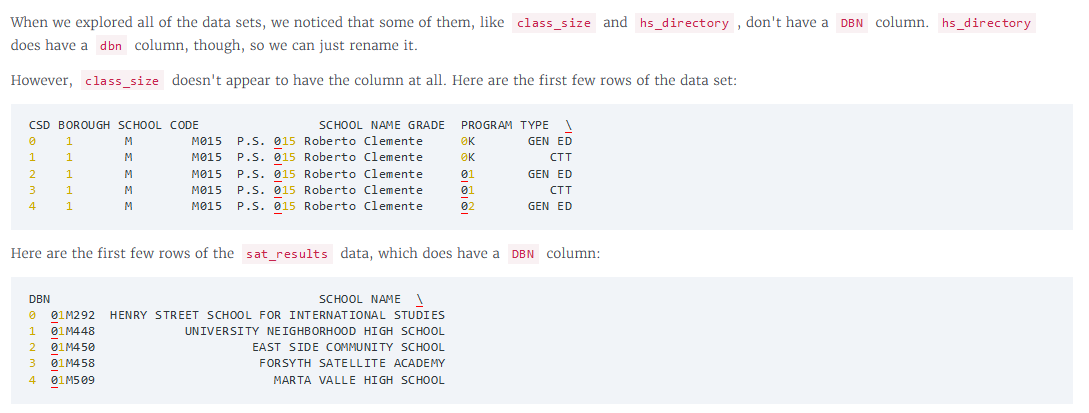

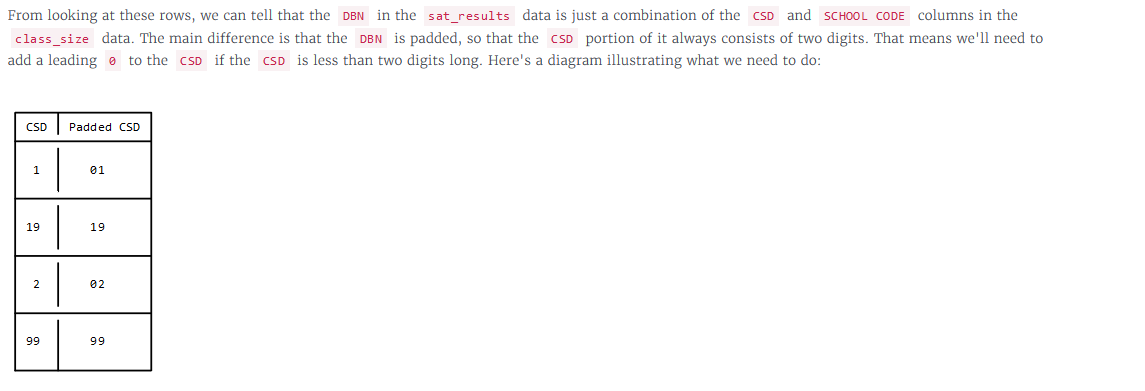

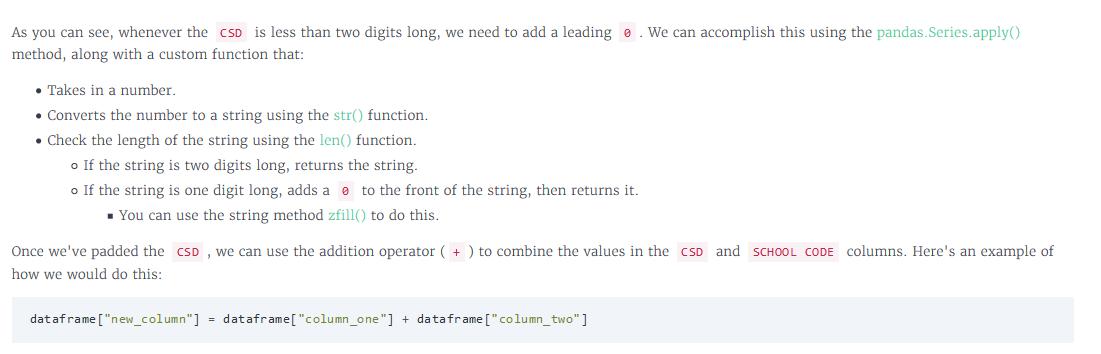

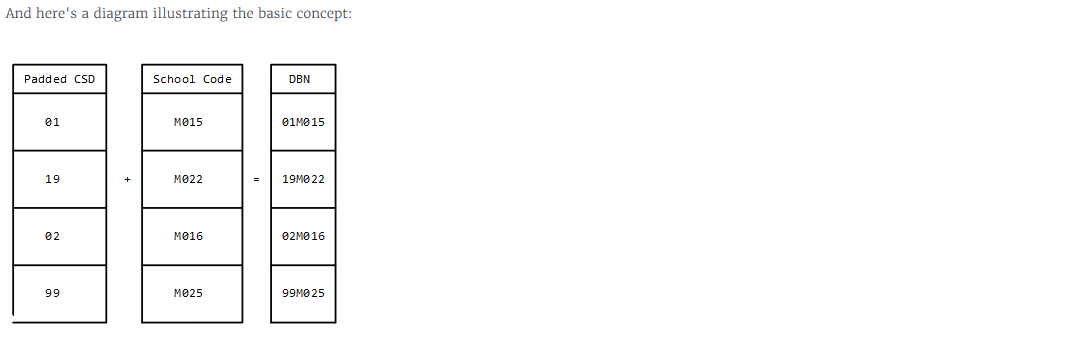

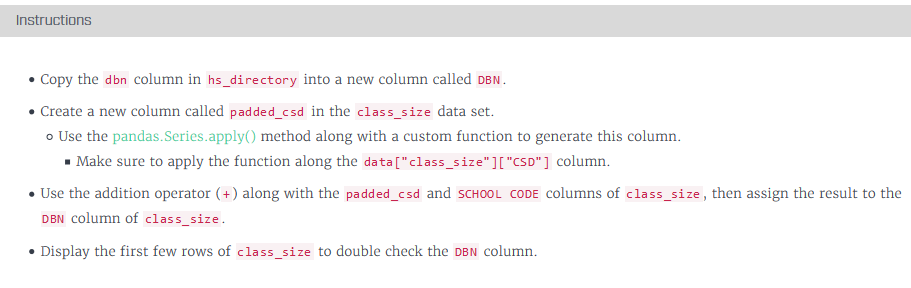

In [79]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    return str(num).zfill(2)
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


In [81]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [82]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

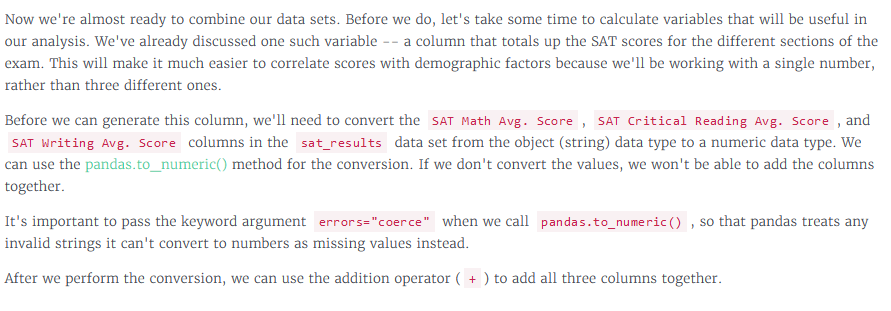

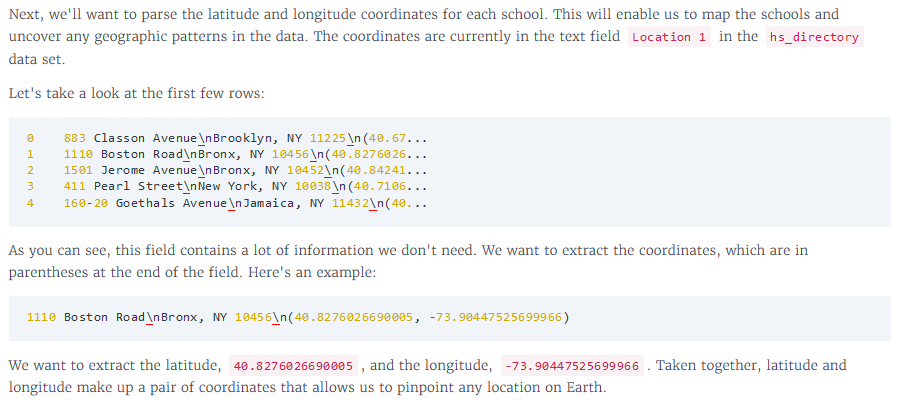

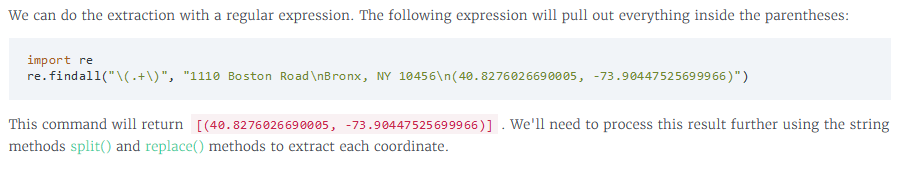

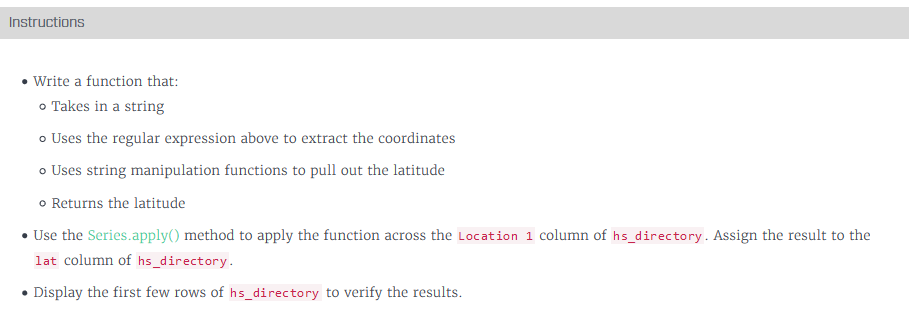

In [80]:
import re
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

print(data["hs_directory"].head())

      dbn                                        school_name    borough  \
0  21K540                             John Dewey High School   Brooklyn   
1  15K429                 Brooklyn School for Global Studies   Brooklyn   
2  24Q530  International High School at LaGuardia Communi...     Queens   
3  05M367  Academy for Social Action: A College Board School  Manhattan   
4  27Q260          Frederick Douglass Academy VI High School     Queens   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          K540  718-373-6400  718-266-4385             9.0              12   
1          K293  718-694-9741  718-694-9745             6.0              12   
2          Q520  718-392-3433  718-392-3443             9.0              12   
3          M043  212-234-3102  212-234-8597             9.0              12   
4          Q465  718-471-2154  718-471-2890             9.0              12   

   expgrade_span_min  expgrade_span_max  ... priority10  \
0              

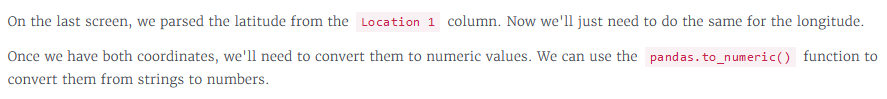

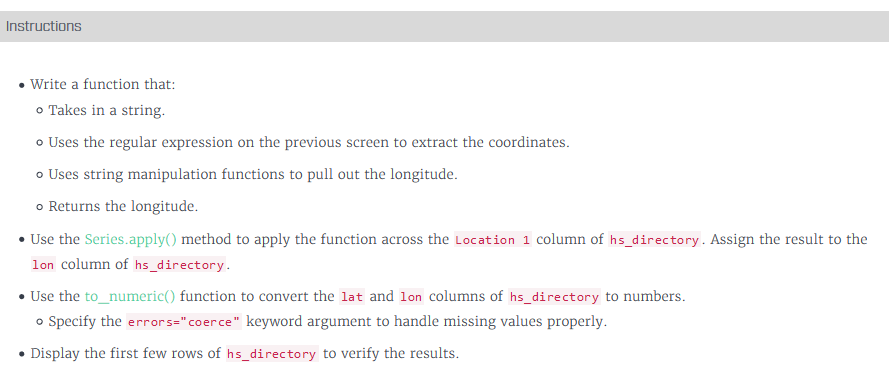

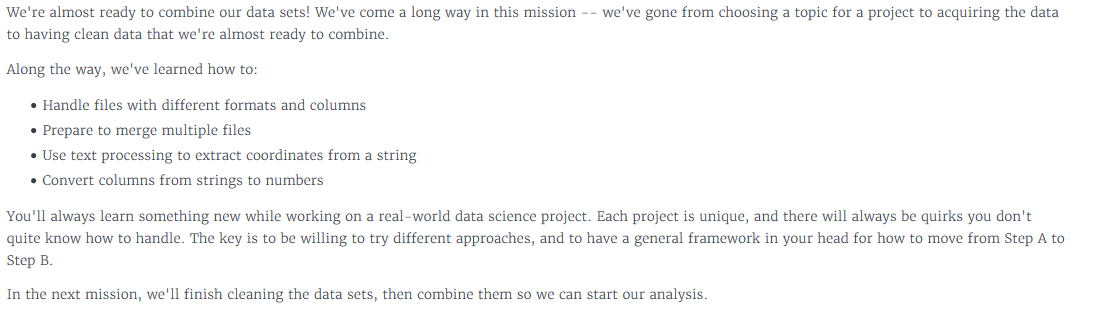

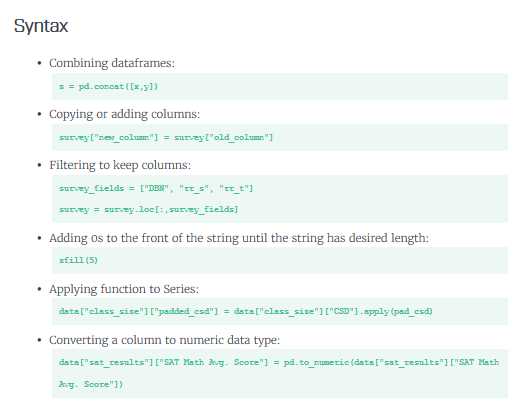

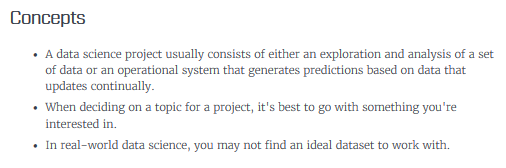

In [19]:
#conda install nbconvert

In the last mission, we began investigating possible relationships between SAT scores and demographic factors. In order to do this, we acquired several data sets about New York City public schools. We manipulated these data sets, and found that we could combine them all using the DBN column. All of the data sets are currently stored as keys in the data dictionary. Each individual data set is a pandas dataframe.

In this mission, we'll clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. In the last mission, we noticed that the values in the DBN column were unique in the sat_results data set. Other data sets like class_size had duplicate DBN values, however.

We'll need to condense these data sets so that each value in the DBN column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, sat_results, has unique DBN values for every high school in New York City, other data sets aren't as clean. A single row in the sat_results data set may match multiple rows in the class_size data set, for example. This situation will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results. Here's a diagram that illustrates the problem:
sat_resultsclass_sizeDBN...DBN...01M022...01M022...05M345...+01M022...02M456...05M345...99M520...05M345...

In the diagram above, we can't just combine the rows from both data sets because there are several cases where multiple rows in class_size match a single row in sat_results.

To resolve this issue, we'll condense the class_size, graduation, and demographics data sets so that each DBN is unique.

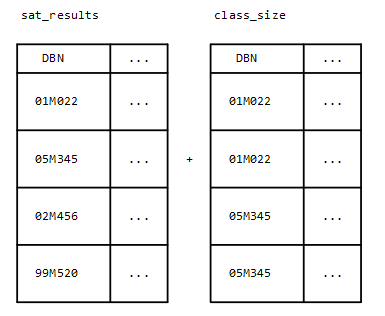

The first data set that we'll condense is class_size. The first few rows of class_size look like this:

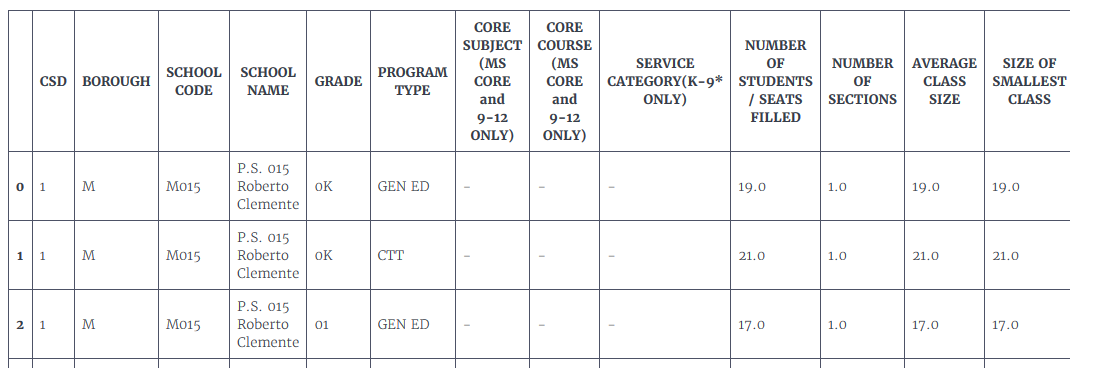

As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:

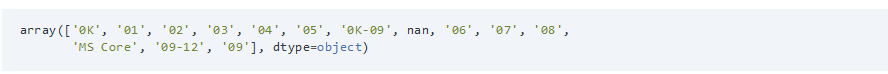



Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:


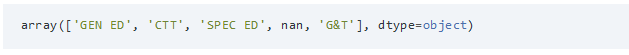

Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

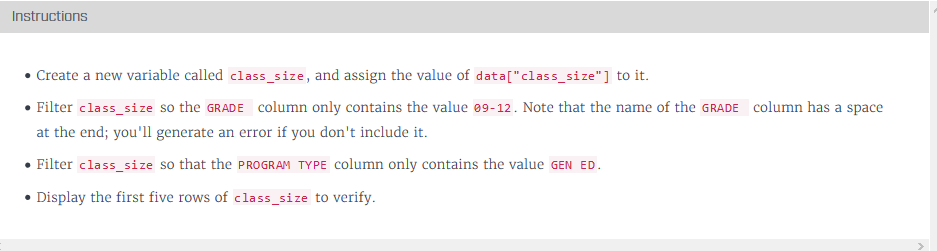

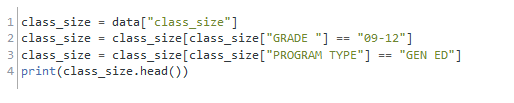

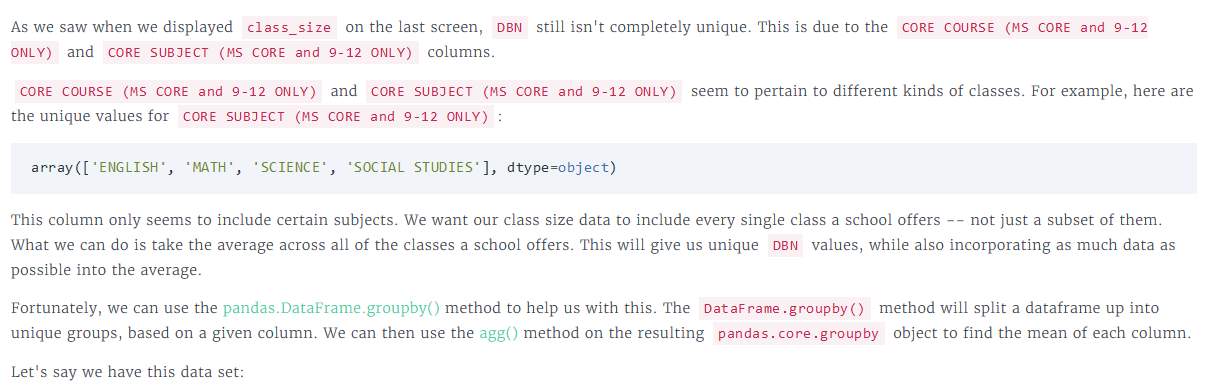

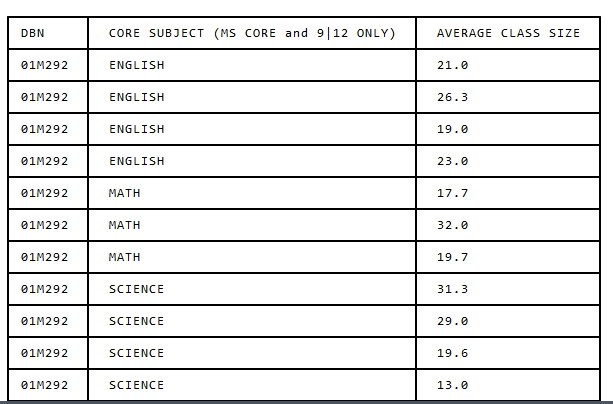

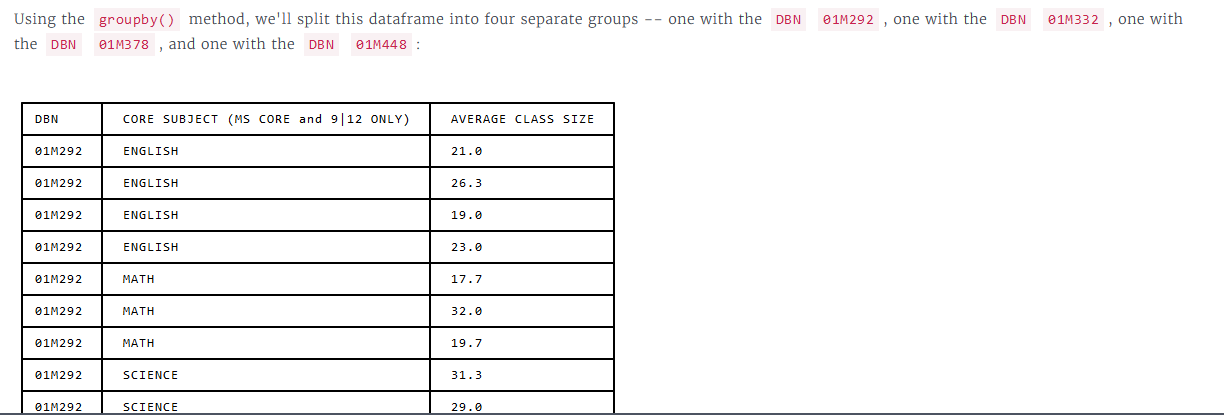

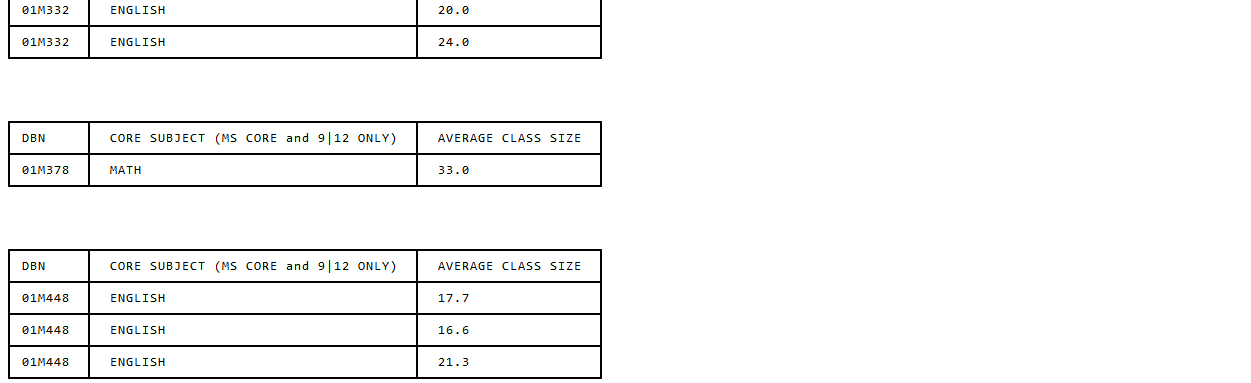

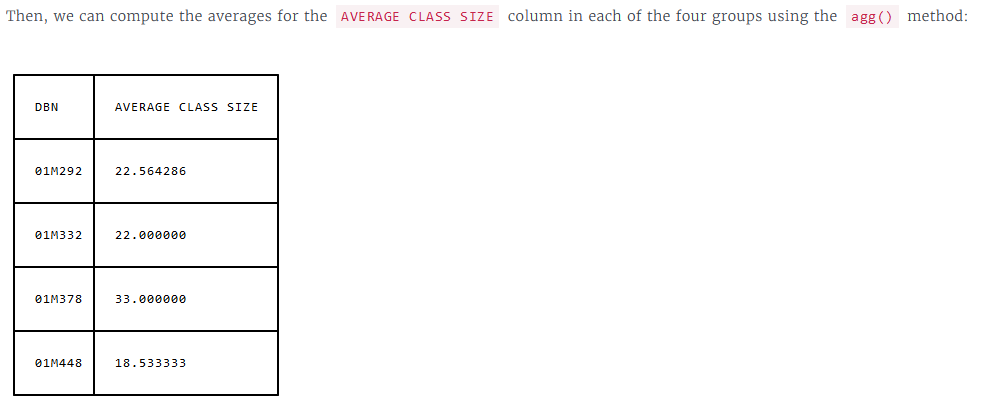

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case DBN) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use pandas.DataFrame.reset_index(). This method will reset the index to a list of integers and make DBN a column again.

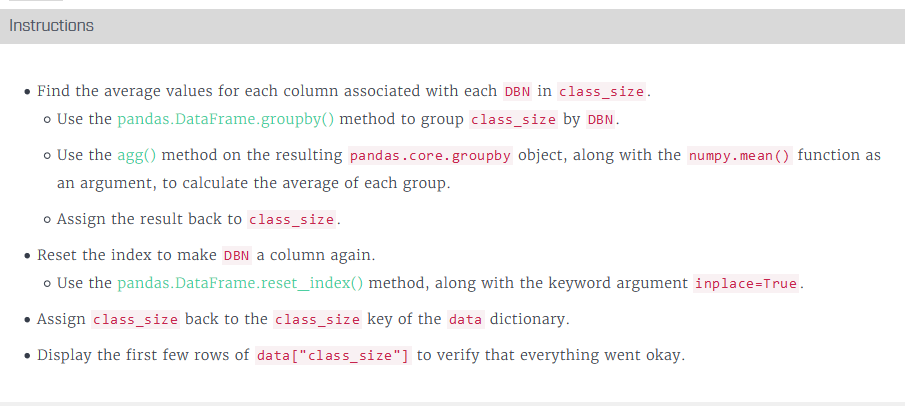

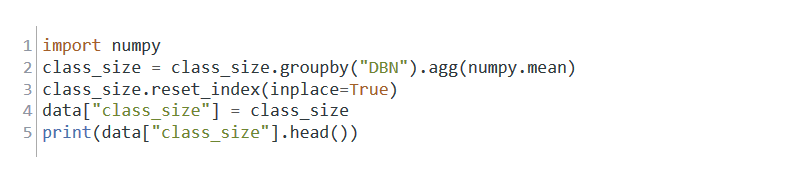

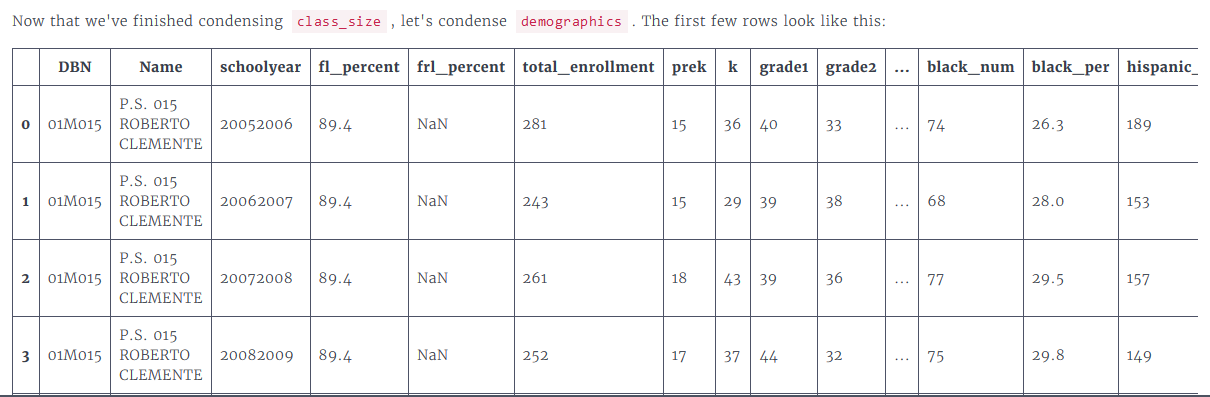

In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

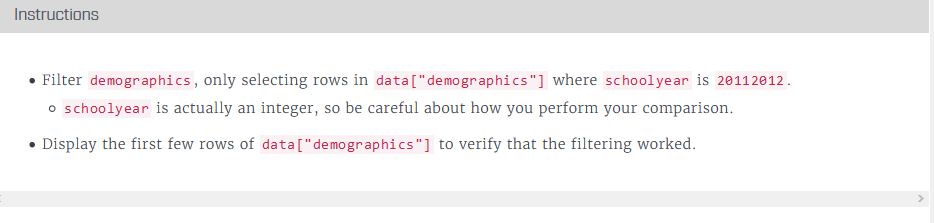

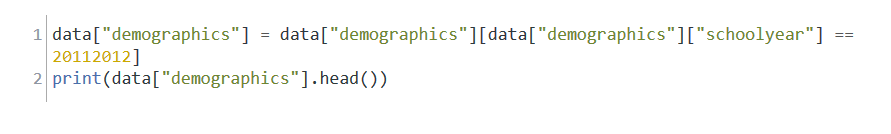

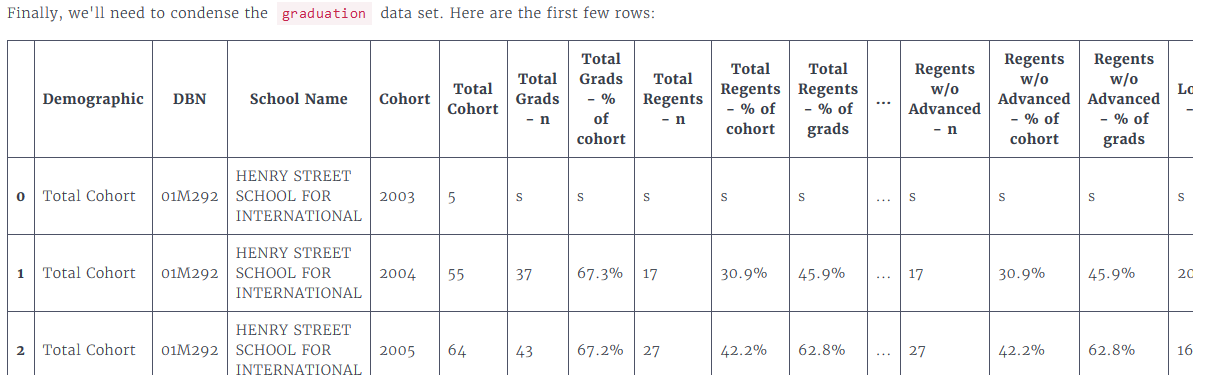

The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

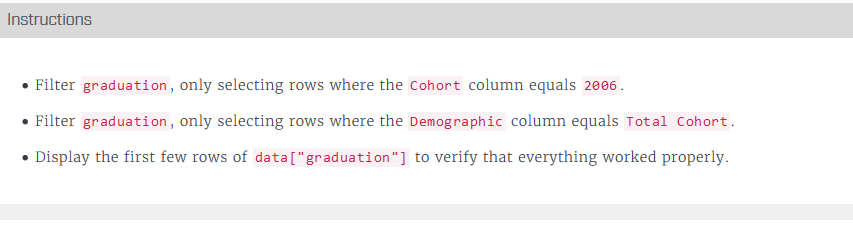

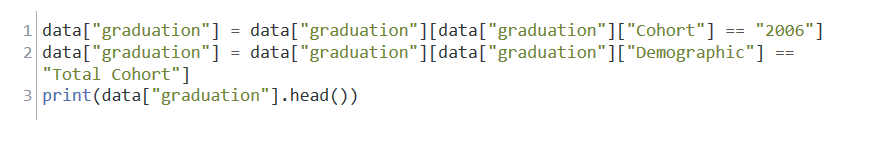

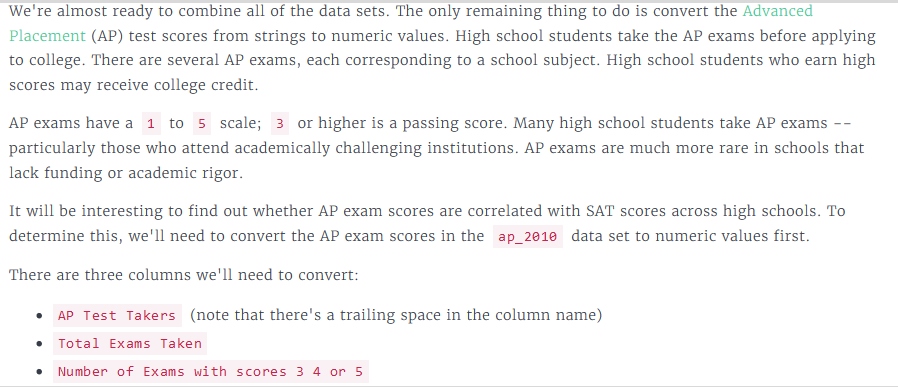

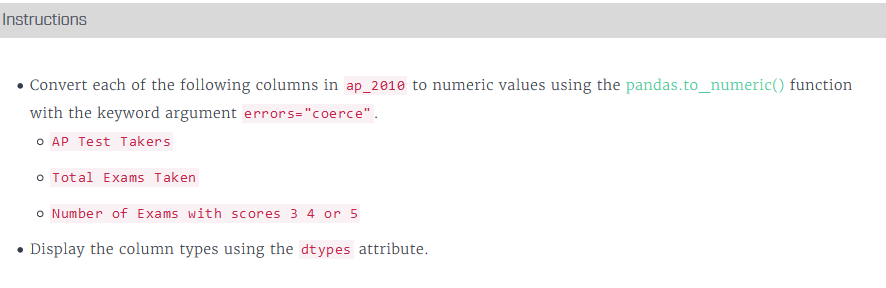

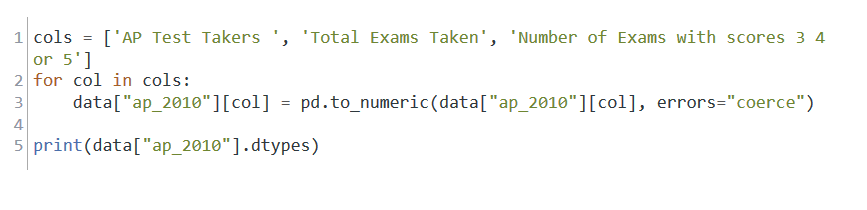

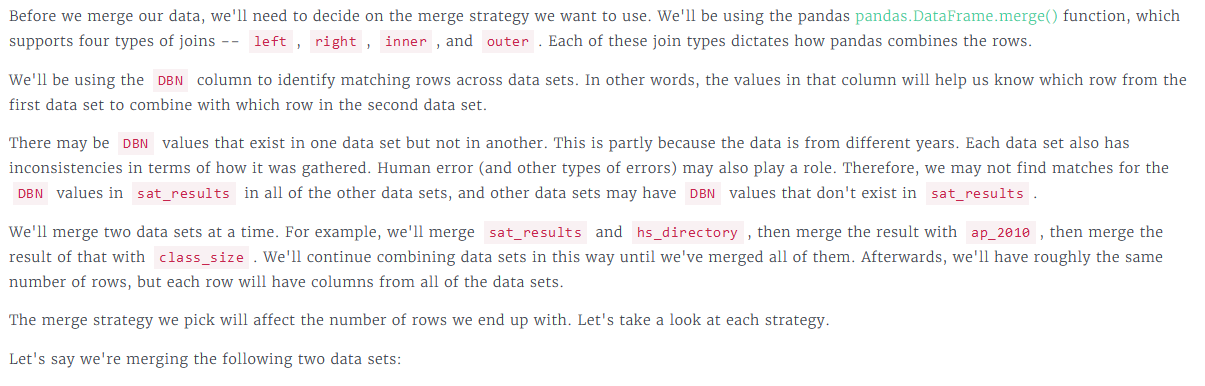

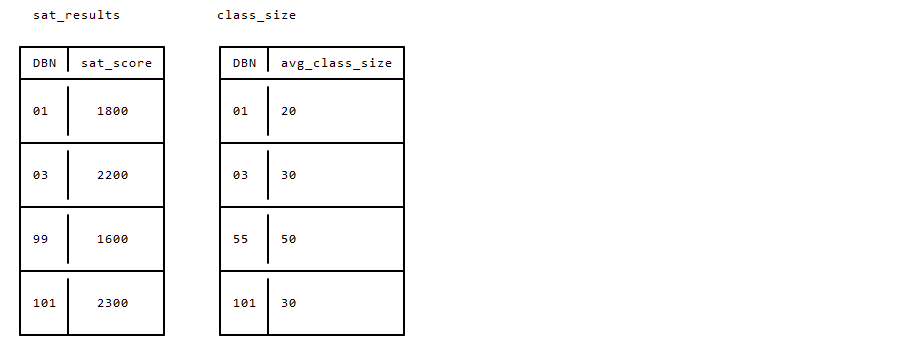

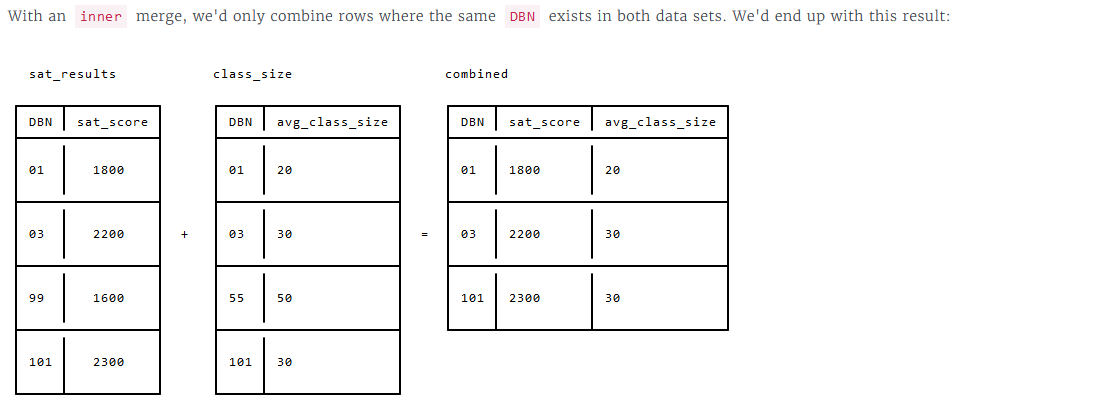

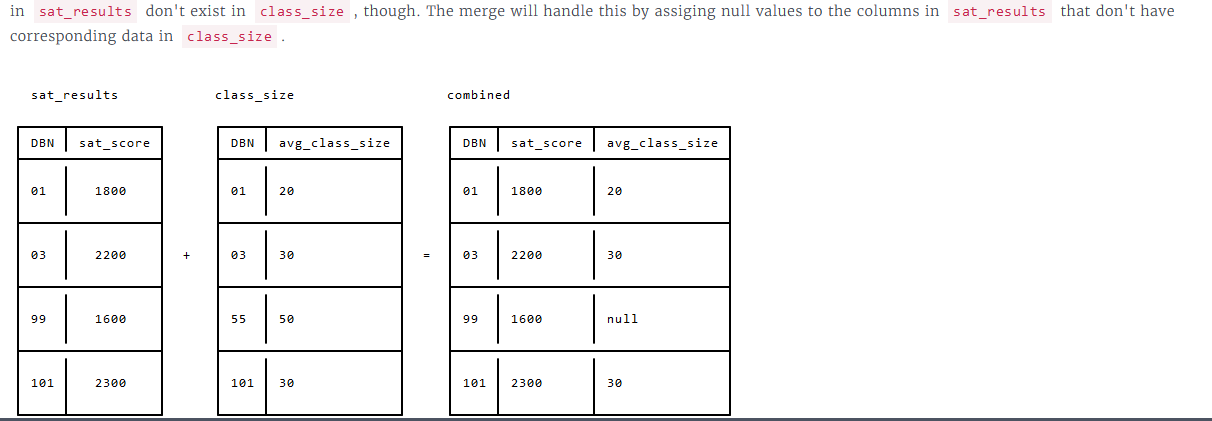

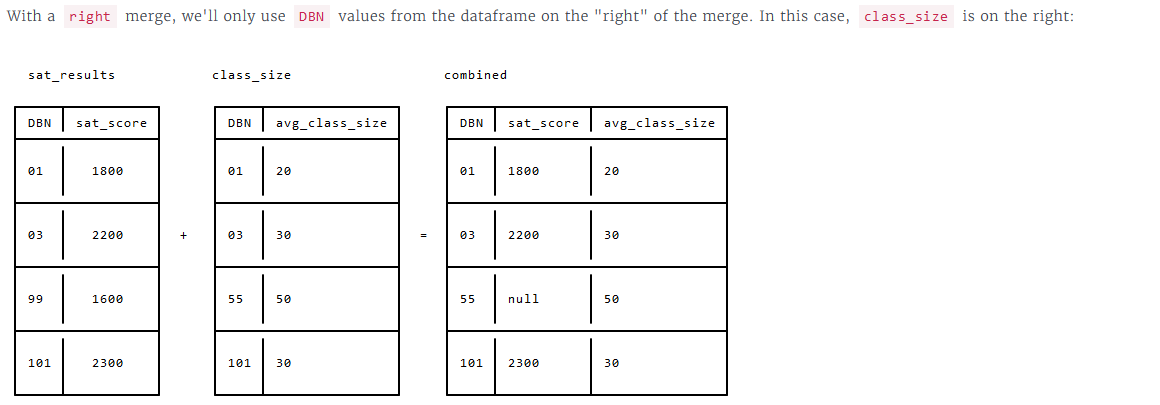

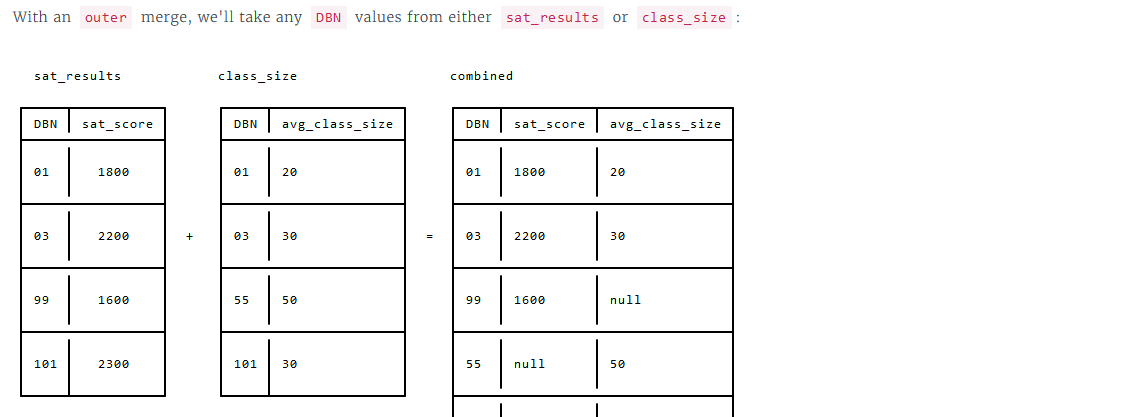

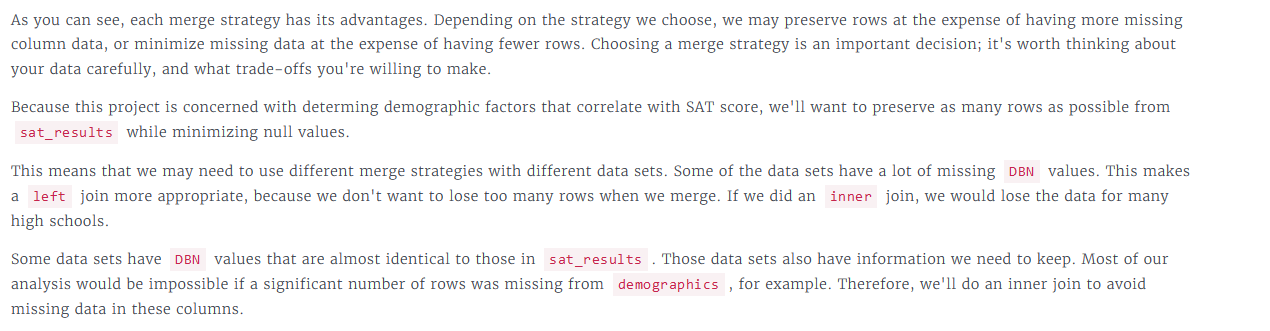

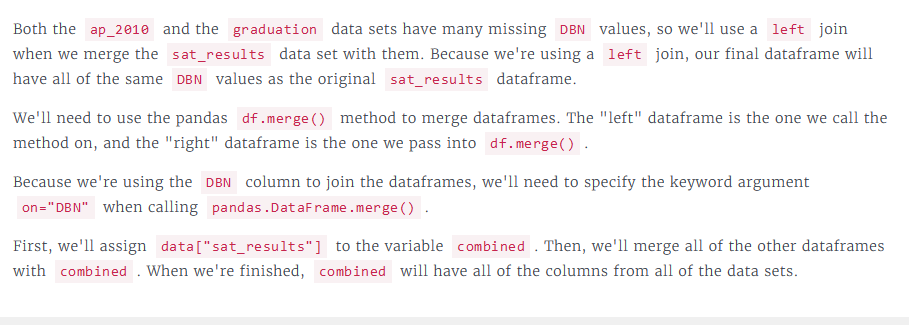

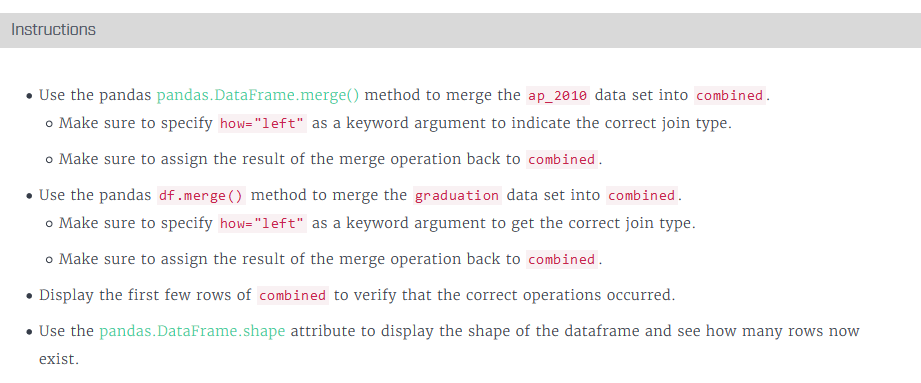

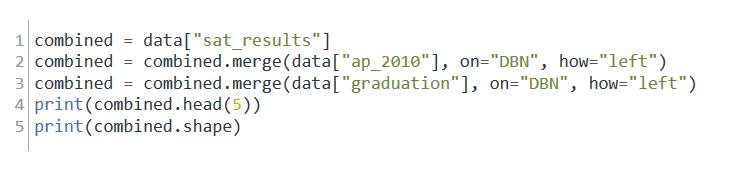

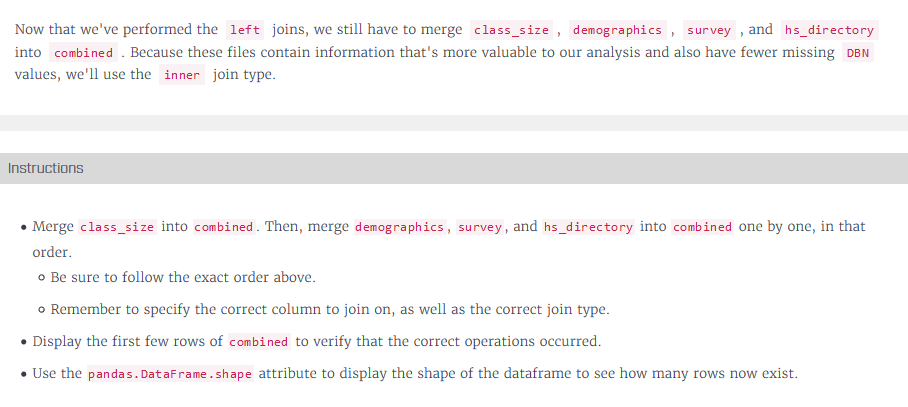

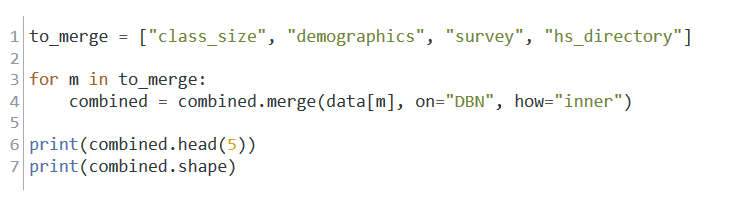

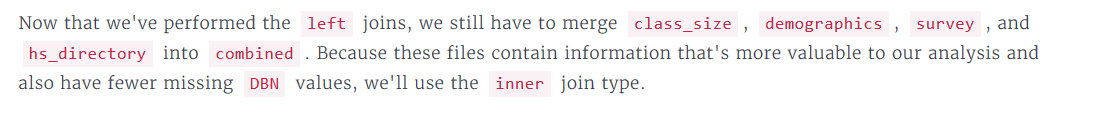

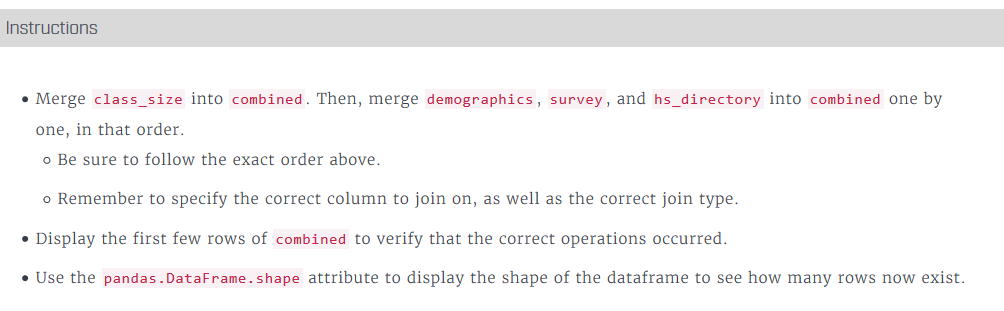

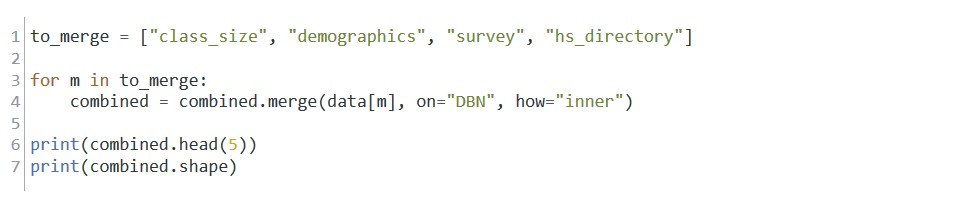

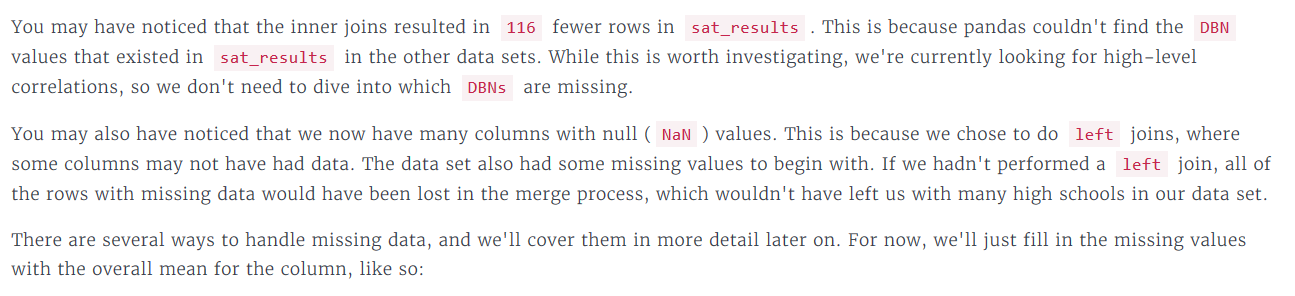

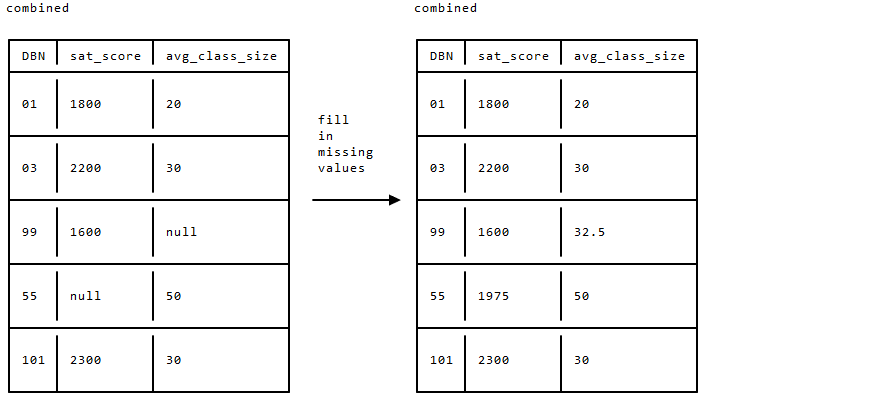

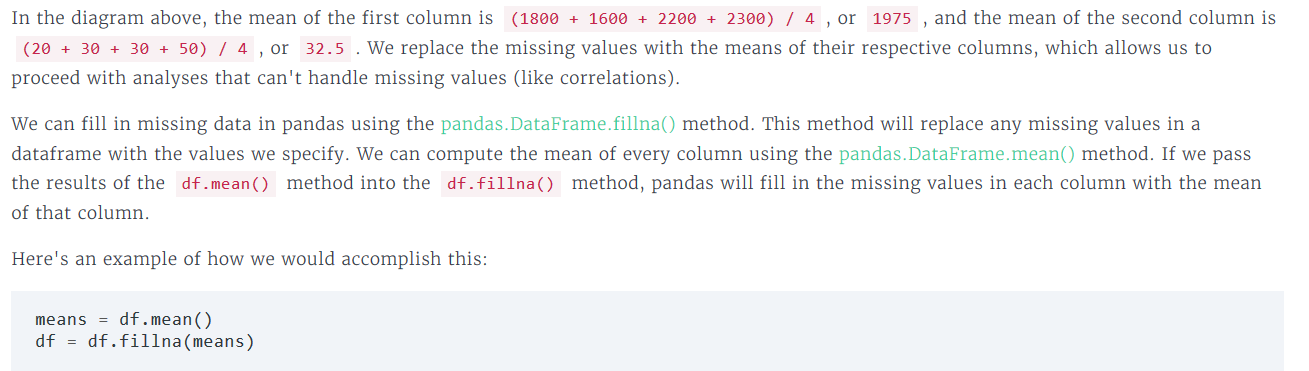

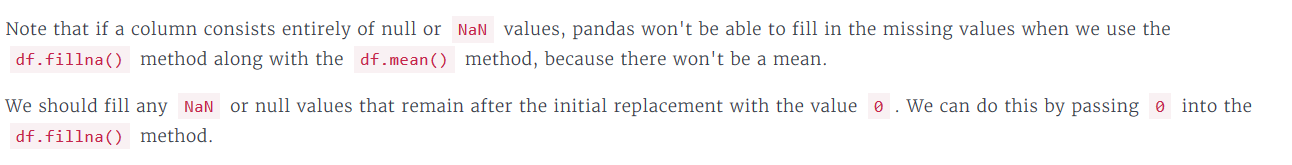

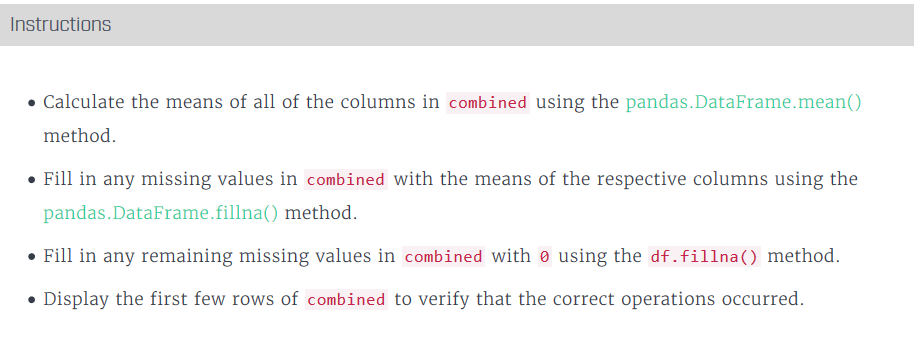

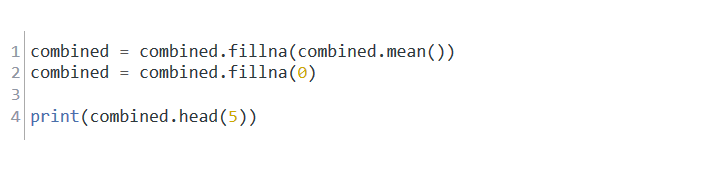

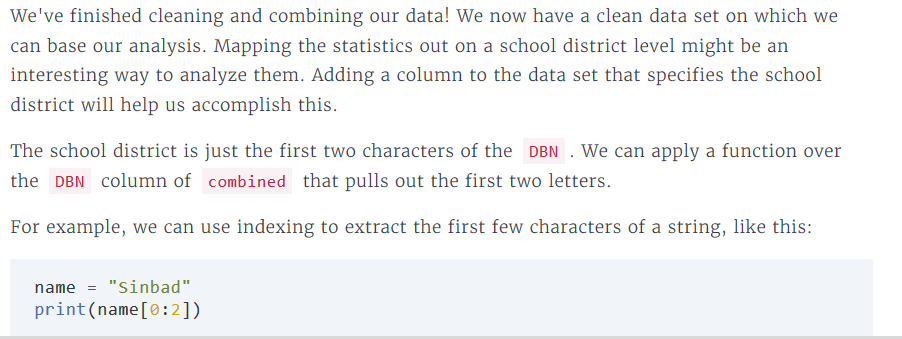

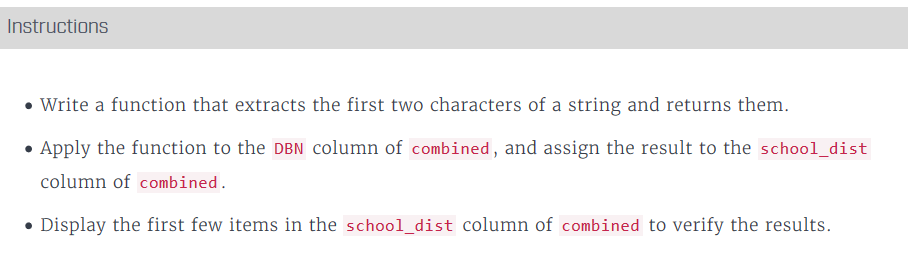

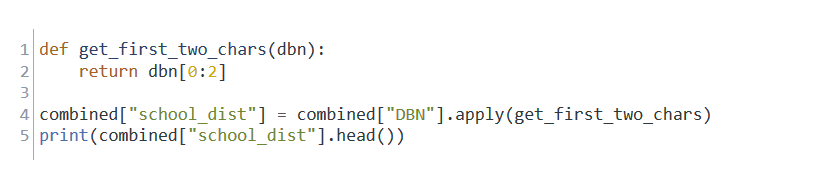

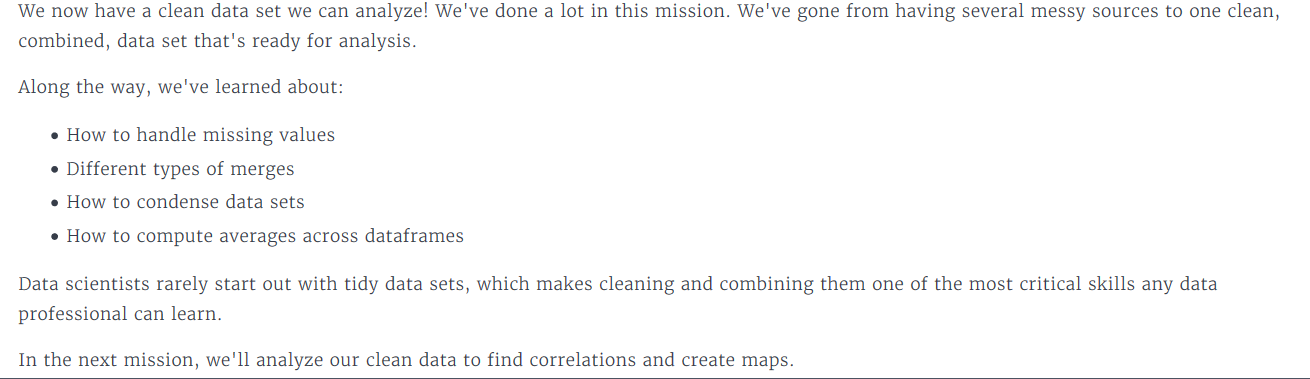

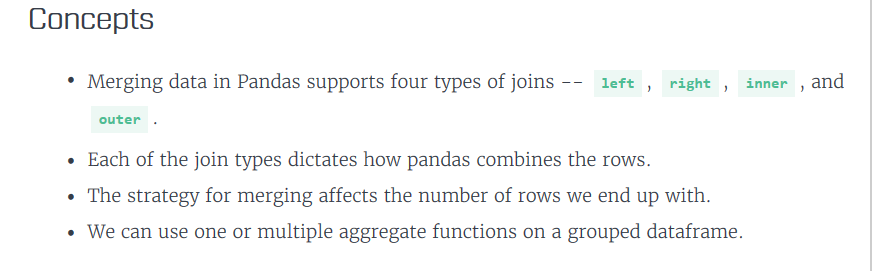

In [83]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [84]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

In [85]:
import numpy
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head()

DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN

In [86]:
data["class_size"]

DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0    01M292    1                          88.000000            4.000000   
1    01M332    1                          46.000000            2.000000   
2    01M378    1                          33.000000            1.000000   
3    01M448    1                         105.687500            4.750000   
4    01M450    1                          57.600000            2.733333   
..      ...  ...                                ...                 ...   
578  32K549   32                          71.066667            3.266667   
579  32K552   32                         102.375000            4.312500   
580  32K554   32                          66.937500            3.812500   
581  32K556   32                         132.333333            5.400000   
582  32K564   32                         136.142857            5.428571   

     AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0             22.564286               18.500000              26.571429   
1             22.000000               21.000000              23.500000   
2             33.000000               33.000000              33.000000   
3             22.231250               18.250000              27.062500   
4             21.200000               19.400000              22.866667   
..                  ...                     ...                    ...   
578           22.760000               19.866667              25.866667   
579           23.900000               19.937500              28.000000   
580           17.793750               14.750000              21.625000   
581           25.060000               18.333333              30.000000   
582           24.964286               20.071429              28.571429   

     SCHOOLWIDE PUPIL-TEACHER RATIO  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  
..                              ...  
578                             NaN  
579                             NaN  
580                             NaN  
581                             NaN  
582                             NaN  

[583 rows x 8 columns]

In [87]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

In [88]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
print(data["graduation"].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  ...  \


In [89]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


In [90]:
sat_results

DBN                                    SCHOOL NAME  sat_score  \
0    01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES     1122.0   
1    01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL     1172.0   
2    01M450                     EAST SIDE COMMUNITY SCHOOL     1149.0   
3    01M458                      FORSYTH SATELLITE ACADEMY     1174.0   
4    01M509                        MARTA VALLE HIGH SCHOOL     1207.0   
..      ...                                            ...        ...   
473  75X012               P.S. X012 LEWIS AND CLARK SCHOOL        NaN   
474  75X754        J. M. RAPPORT SCHOOL CAREER DEVELOPMENT        NaN   
475  79M645     SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION        NaN   
476  79Q950                            GED PLUS s CITYWIDE     1322.0   
477  79X490                                PHOENIX ACADEMY     1097.0   

     SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0                              355.0                404.0   
1                              383.0                423.0   
2                              377.0                402.0   
3                              414.0                401.0   
4                              390.0                433.0   
..                               ...                  ...   
473                              NaN                  NaN   
474                              NaN                  NaN   
475                              NaN                  NaN   
476                            496.0                400.0   
477                            367.0                370.0   

     SAT Writing Avg. Score  
0                     363.0  
1                     366.0  
2                     370.0  
3                     359.0  
4                     384.0  
..                      ...  
473                     NaN  
474                     NaN  
475                     NaN  
476                   426.0  
477                   360.0  

[478 rows x 6 columns]

In [91]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined
print(combined.shape)
combined

(479, 10)


DBN                                    SCHOOL NAME  sat_score  \
0    01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES     1122.0   
1    01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL     1172.0   
2    01M450                     EAST SIDE COMMUNITY SCHOOL     1149.0   
3    01M458                      FORSYTH SATELLITE ACADEMY     1174.0   
4    01M509                        MARTA VALLE HIGH SCHOOL     1207.0   
..      ...                                            ...        ...   
474  75X012               P.S. X012 LEWIS AND CLARK SCHOOL        NaN   
475  75X754        J. M. RAPPORT SCHOOL CAREER DEVELOPMENT        NaN   
476  79M645     SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION        NaN   
477  79Q950                            GED PLUS s CITYWIDE     1322.0   
478  79X490                                PHOENIX ACADEMY     1097.0   

     SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0                              355.0                404.0   
1                              383.0                423.0   
2                              377.0                402.0   
3                              414.0                401.0   
4                              390.0                433.0   
..                               ...                  ...   
474                              NaN                  NaN   
475                              NaN                  NaN   
476                              NaN                  NaN   
477                            496.0                400.0   
478                            367.0                370.0   

     SAT Writing Avg. Score                    SchoolName  AP Test Takers   \
0                     363.0                           NaN              NaN   
1                     366.0  UNIVERSITY NEIGHBORHOOD H.S.             39.0   
2                     370.0        EAST SIDE COMMUNITY HS             19.0   
3                     359.0                           NaN              NaN   
4                     384.0                           NaN              NaN   
..                      ...                           ...              ...   
474                     NaN                           NaN              NaN   
475                     NaN                           NaN              NaN   
476                     NaN                           NaN              NaN   
477                   426.0                           NaN              NaN   
478                   360.0                           NaN              NaN   

     Total Exams Taken  Number of Exams with scores 3 4 or 5  
0                  NaN                                   NaN  
1                 49.0                                  10.0  
2                 21.0                                   NaN  
3                  NaN                                   NaN  
4                  NaN                                   NaN  
..                 ...                                   ...  
474                NaN                                   NaN  
475                NaN                                   NaN  
476                NaN                                   NaN  
477                NaN                                   NaN  
478                NaN                                   NaN  

[479 rows x 10 columns]

In [92]:

combined = combined.merge(data["graduation"], on="DBN", how="left")

print(combined.shape)
combined

(479, 32)


DBN                                    SCHOOL NAME  sat_score  \
0    01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES     1122.0   
1    01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL     1172.0   
2    01M450                     EAST SIDE COMMUNITY SCHOOL     1149.0   
3    01M458                      FORSYTH SATELLITE ACADEMY     1174.0   
4    01M509                        MARTA VALLE HIGH SCHOOL     1207.0   
..      ...                                            ...        ...   
474  75X012               P.S. X012 LEWIS AND CLARK SCHOOL        NaN   
475  75X754        J. M. RAPPORT SCHOOL CAREER DEVELOPMENT        NaN   
476  79M645     SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION        NaN   
477  79Q950                            GED PLUS s CITYWIDE     1322.0   
478  79X490                                PHOENIX ACADEMY     1097.0   

     SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0                              355.0                404.0   
1                              383.0                423.0   
2                              377.0                402.0   
3                              414.0                401.0   
4                              390.0                433.0   
..                               ...                  ...   
474                              NaN                  NaN   
475                              NaN                  NaN   
476                              NaN                  NaN   
477                            496.0                400.0   
478                            367.0                370.0   

     SAT Writing Avg. Score                    SchoolName  AP Test Takers   \
0                     363.0                           NaN              NaN   
1                     366.0  UNIVERSITY NEIGHBORHOOD H.S.             39.0   
2                     370.0        EAST SIDE COMMUNITY HS             19.0   
3                     359.0                           NaN              NaN   
4                     384.0                           NaN              NaN   
..                      ...                           ...              ...   
474                     NaN                           NaN              NaN   
475                     NaN                           NaN              NaN   
476                     NaN                           NaN              NaN   
477                   426.0                           NaN              NaN   
478                   360.0                           NaN              NaN   

     Total Exams Taken  Number of Exams with scores 3 4 or 5  ...  \
0                  NaN                                   NaN  ...   
1                 49.0                                  10.0  ...   
2                 21.0                                   NaN  ...   
3                  NaN                                   NaN  ...   
4                  NaN                                   NaN  ...   
..                 ...                                   ...  ...   
474                NaN                                   NaN  ...   
475                NaN                                   NaN  ...   
476                NaN                                   NaN  ...   
477                NaN                                   NaN  ...   
478                NaN                                   NaN  ...   

    Regents w/o Advanced - n Regents w/o Advanced - % of cohort  \
0                         36                               46.2   
1                         34                               27.4   
2                         67                               74.4   
3                        NaN                                NaN   
4                         23                               27.4   
..                       ...                                ...   
474                      NaN                                NaN   
475                      NaN                                NaN   
476                      NaN 

In [93]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

print(combined.head(5))
print(combined.shape)

      DBN                                        SCHOOL NAME  sat_score  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES     1122.0   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL     1172.0   
2  01M450                         EAST SIDE COMMUNITY SCHOOL     1149.0   
3  01M509                            MARTA VALLE HIGH SCHOOL     1207.0   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...     1621.0   

   SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0                            355.0                404.0   
1                            383.0                423.0   
2                            377.0                402.0   
3                            390.0                433.0   
4                            522.0                574.0   

   SAT Writing Avg. Score                      SchoolName  AP Test Takers   \
0                   363.0                             NaN              NaN   
1                   366.0    UNIVERSIT

In [94]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

print(combined.head(5))

      DBN                                        SCHOOL NAME  sat_score  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES     1122.0   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL     1172.0   
2  01M450                         EAST SIDE COMMUNITY SCHOOL     1149.0   
3  01M509                            MARTA VALLE HIGH SCHOOL     1207.0   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...     1621.0   

   SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0                            355.0                404.0   
1                            383.0                423.0   
2                            377.0                402.0   
3                            390.0                433.0   
4                            522.0                574.0   

   SAT Writing Avg. Score                      SchoolName  AP Test Takers   \
0                   363.0                               0       129.028846   
1                   366.0    UNIVERSIT

In [95]:
combined

DBN                                        SCHOOL NAME  sat_score  \
0    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES     1122.0   
1    01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL     1172.0   
2    01M450                         EAST SIDE COMMUNITY SCHOOL     1149.0   
3    01M509                            MARTA VALLE HIGH SCHOOL     1207.0   
4    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...     1621.0   
..      ...                                                ...        ...   
358  32K545        EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK     1154.0   
359  32K549                 BUSHWICK SCHOOL FOR SOCIAL JUSTICE     1035.0   
360  32K552                          ACADEMY OF URBAN PLANNING     1060.0   
361  32K554               ALL CITY LEADERSHIP SECONDARY SCHOOL     1315.0   
362  32K556  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...     1055.0   

     SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0                              355.0                404.0   
1                              383.0                423.0   
2                              377.0                402.0   
3                              390.0                433.0   
4                              522.0                574.0   
..                               ...                  ...   
358                            384.0                409.0   
359                            348.0                353.0   
360                            342.0                364.0   
361                            428.0                465.0   
362                            347.0                358.0   

     SAT Writing Avg. Score  \
0                     363.0   
1                     366.0   
2                     370.0   
3                     384.0   
4                     525.0   
..                      ...   
358                   361.0   
359                   334.0   
360                   354.0   
361                   422.0   
362                   350.0   

                                            SchoolName  AP Test Takers   \
0                                                    0       129.028846   
1                         UNIVERSITY NEIGHBORHOOD H.S.        39.000000   
2                               EAST SIDE COMMUNITY HS        19.000000   
3                                                    0       129.028846   
4                       NEW EXPLORATIONS SCI,TECH,MATH       255.000000   
..                                                 ...              ...   
358                      EBC-HS FOR PUB SERVICE (BUSH)        47.000000   
359                                                  0       129.028846   
360                          Academy of Urban Planning        76.000000   
361               All City Leadership Secondary School         7.000000   
362  Bushwick Leaders High School for Academic Exce...        34.000000   

     Total Exams Taken  Number of Exams with scores 3 4 or 5  ... priority10  \
0           197.038462                                153.45  ...          0   
1            49.000000                                 10.00  ...          0   
2            21.000000                                153.45  ...          0   
3           197.038462                                153.45  ...          0   
4           377.000000                                191.00  ...          0   
..                 ...                                   ...  ...        ...   
358          64.000000                                 13.00  ...          0   
359         197.038462                                153.45  ...          0   
360         100.000000                                 10.00  ...          0   
361           8.000000                                153.45  ...          0   
362          35.000000                                 18.00  ...          0   

                                            Location 1 Community Board  \
0    220 Henry Street\nNew York, NY 10002

In [96]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


Over the last two missions, we began investigating possible relationships between SAT scores and demographics. In order to do this, we acquired several data sets containing information about New York City public schools. We cleaned them, then combined them into a single data set named combined that we're now ready to analyze and visualize.

In this mission, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

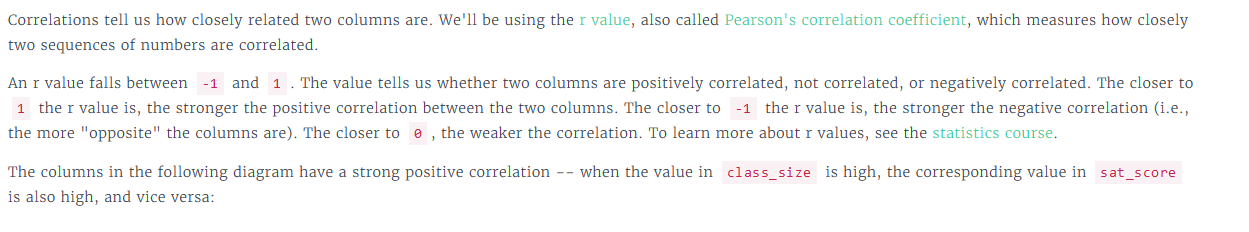

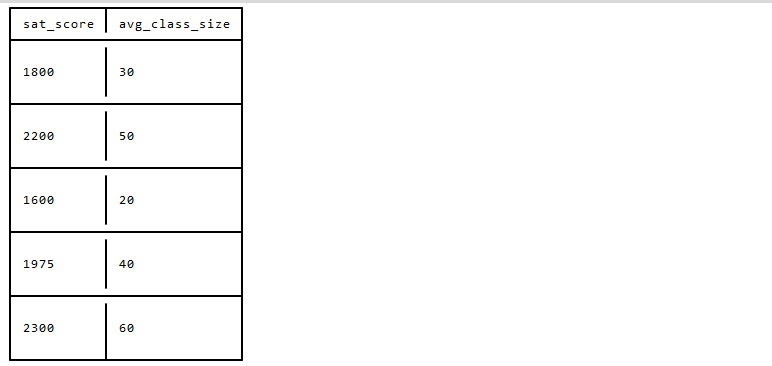

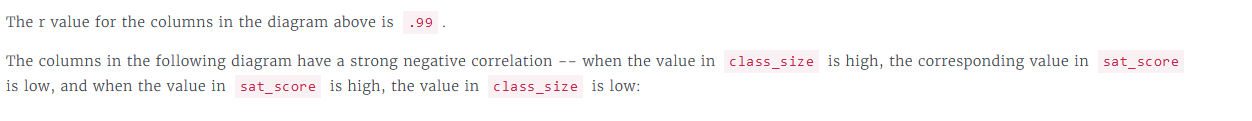

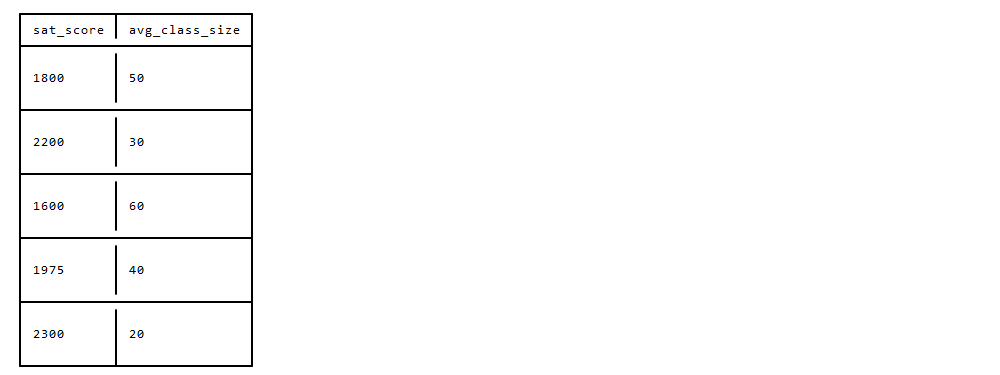

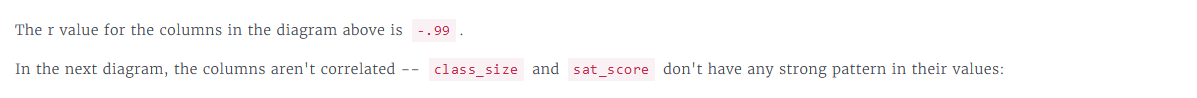

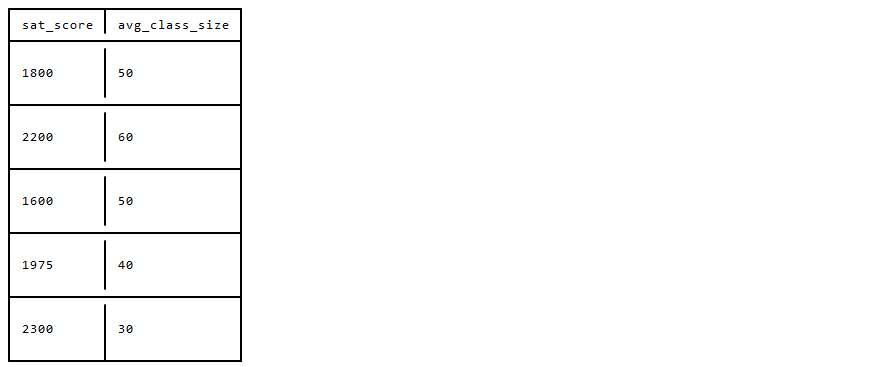

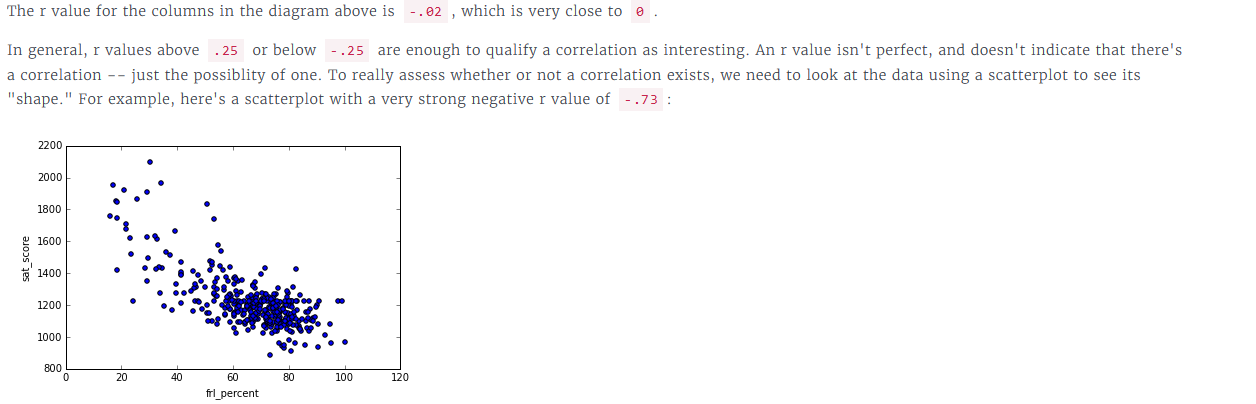

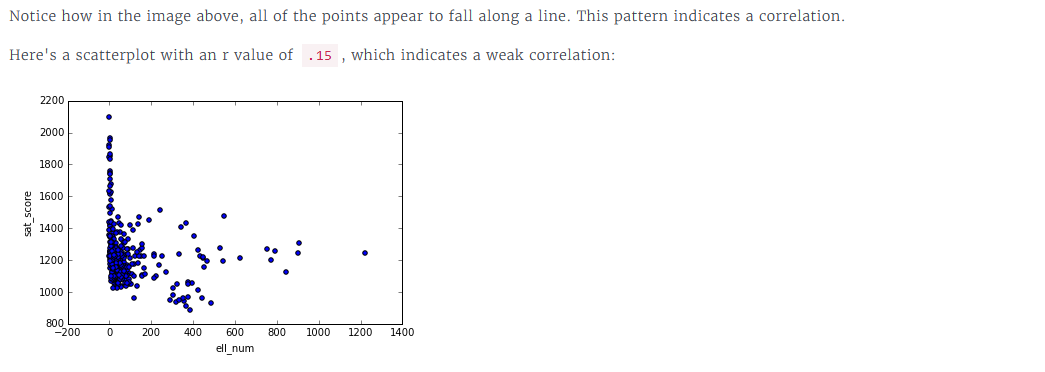

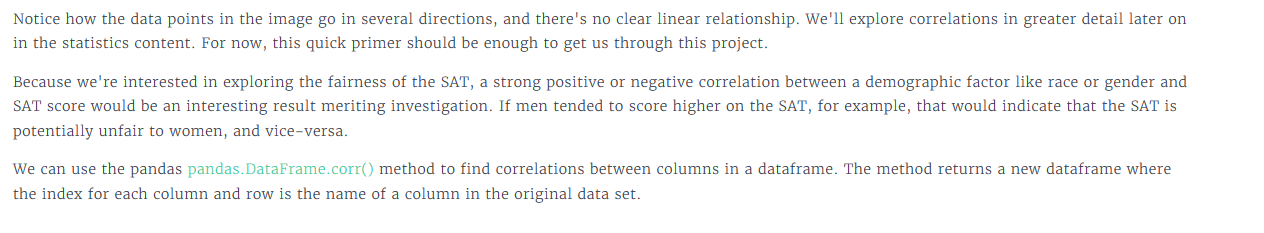

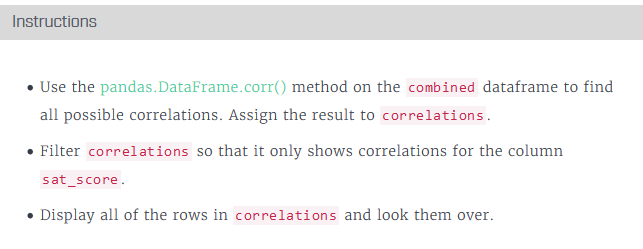

In [97]:
correlations = combined.corr()
correlations = correlations["total_enrollment"]
print(correlations)

sat_score                          0.367857
SAT Critical Reading Avg. Score    0.330396
SAT Math Avg. Score                0.421192
SAT Writing Avg. Score             0.325618
AP Test Takers                     0.651925
                                     ...   
Census Tract                       0.071529
BIN                                0.282115
BBL                                0.281808
lat                               -0.179334
lon                               -0.023981
Name: total_enrollment, Length: 85, dtype: float64


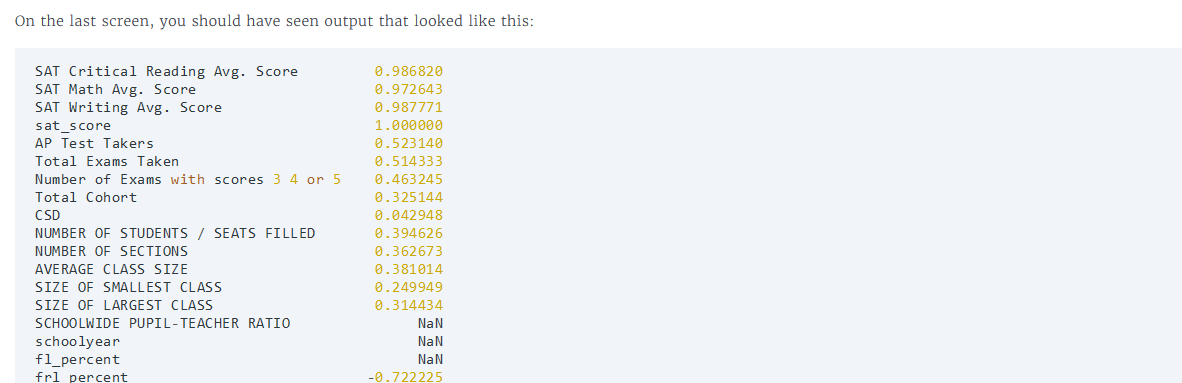

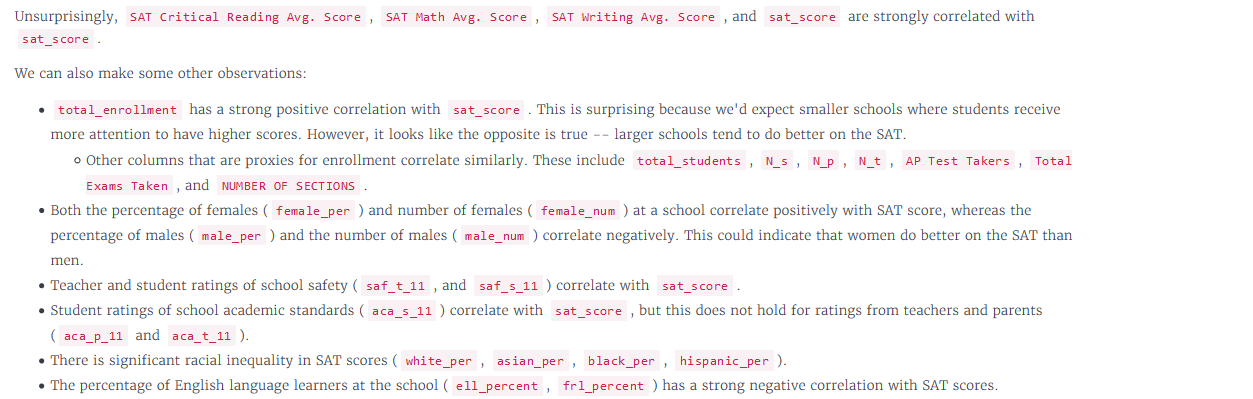

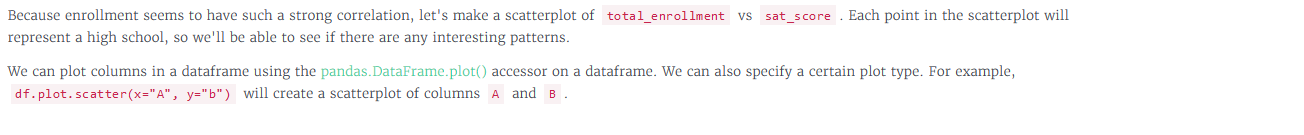

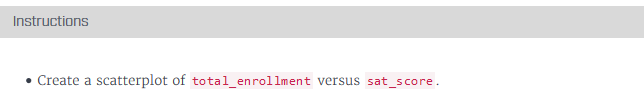

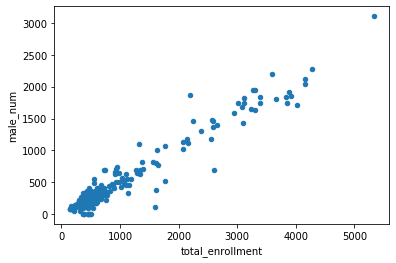

In [98]:
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='male_num')
plt.show()

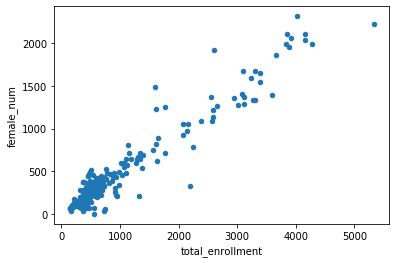

In [99]:
combined.plot.scatter(x='total_enrollment', y='female_num')
plt.show()

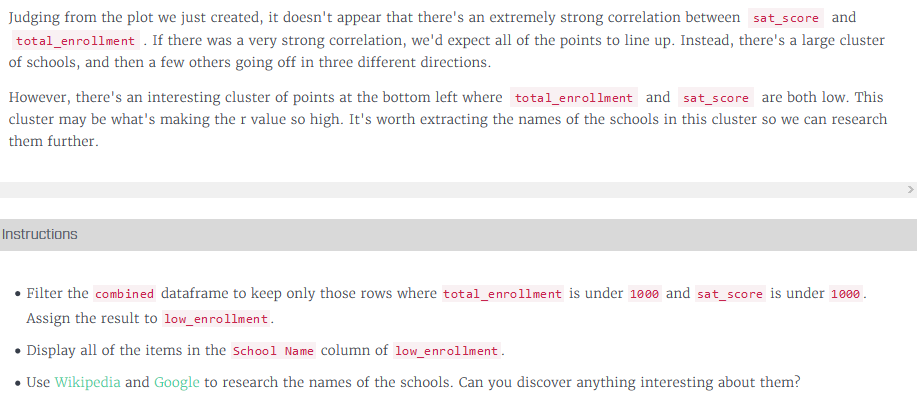

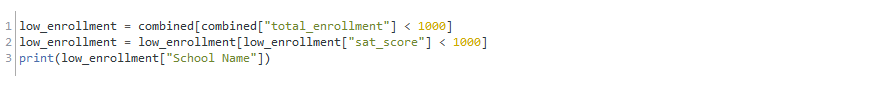

In [100]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["ell_percent"] < 1000]
print(low_enrollment["School Name"])

0      HENRY STREET SCHOOL FOR INTERNATIONAL
1        UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2                 EAST SIDE COMMUNITY SCHOOL
3                    MARTA VALLE HIGH SCHOOL
5             BARD HIGH SCHOOL EARLY COLLEGE
                       ...                  
358    EBC HIGH SCHOOL FOR PUBLIC SERVICEBU
359       BUSHWICK SCHOOL FOR SOCIAL JUSTICE
360                ACADEMY OF URBAN PLANNING
361     ALL CITY LEADERSHIP SECONDARY SCHOOL
362    BUSHWICK LEADERS HIGH SCHOOL FOR ACAD
Name: School Name, Length: 301, dtype: object


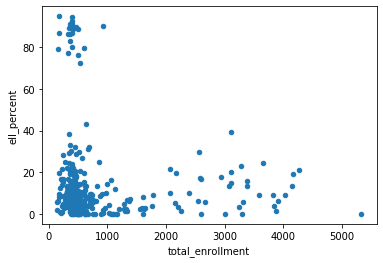

In [101]:
combined.plot.scatter(x='total_enrollment', y='ell_percent')
plt.show()

---

Analyzing NYC High School Data

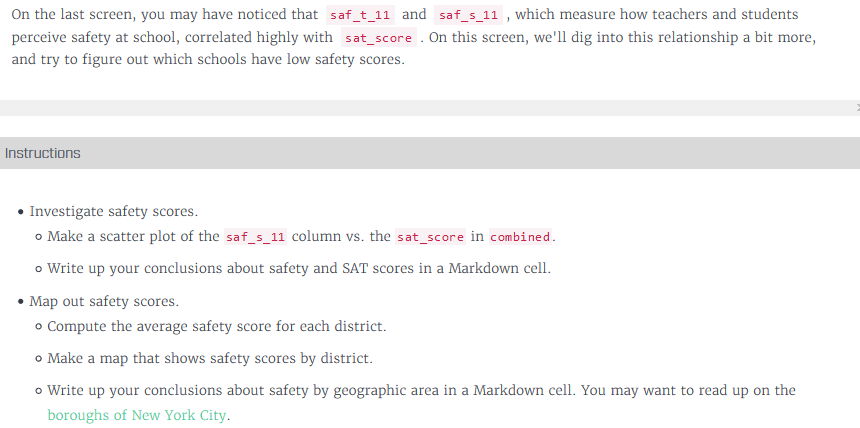



There are high correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.


In [103]:
survey_fields.remove("DBN")

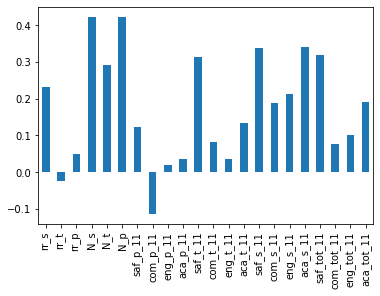

In [104]:
%matplotlib inline
combined.corr()["sat_score"][survey_fields].plot.bar()

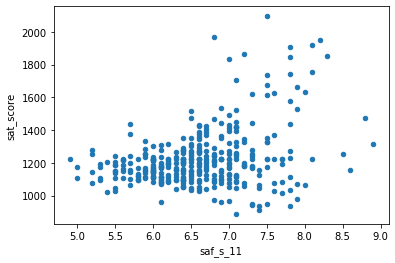

In [105]:
combined.plot.scatter("saf_s_11", "sat_score")

There appears to be a correlation between SAT scores and safety, although it isn't thatstrong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

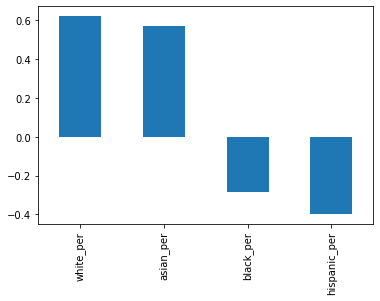

In [107]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()

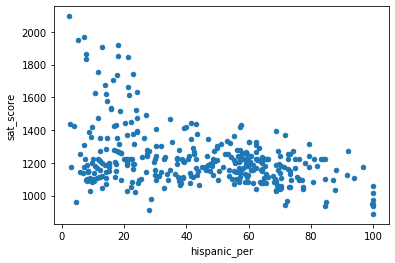

In [108]:
combined.plot.scatter("hispanic_per", "sat_score")

There appears to be a correlation between SAT scores and safety, although it isn't thatstrong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

Plotting safety

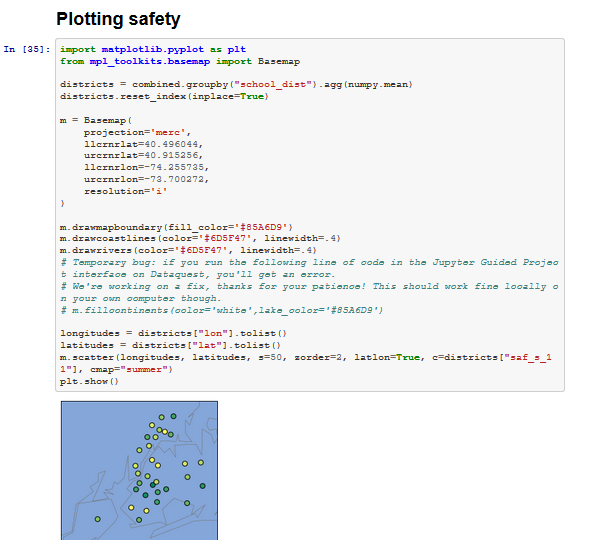



It looks like Upper Manhattan and parts of Queens and the Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.
Racial differences in SAT scores¶


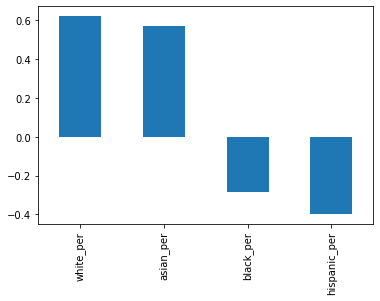

In [117]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()

In [120]:
combined[combined["hispanic_per"] > 95]["SCHOOL NAME"]


44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

---

In [110]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object




Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.


Gender differences in SAT scores


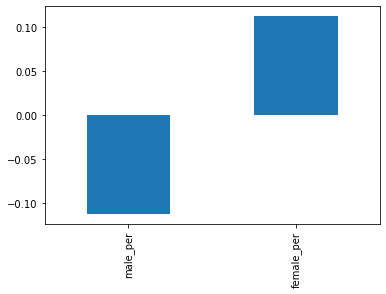

In [111]:
gender_fields = ["male_per", "female_per"]
combined.corr()["sat_score"][gender_fields].plot.bar()



In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.


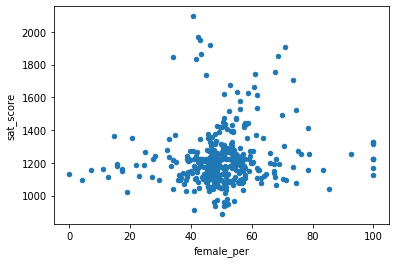

In [112]:
combined.plot.scatter("female_per", "sat_score")



Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores.


In [113]:
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object



AP Exam Scores vs SAT Scores

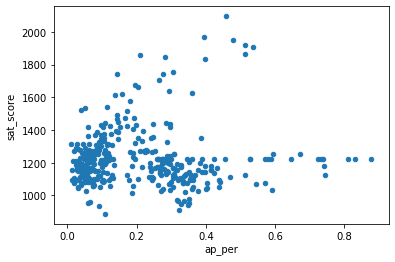

In [115]:
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

combined.plot.scatter(x='ap_per', y='sat_score')



It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not an extremely strong correlation, though.
